## Muziek genre voorspellen

- Naam: Vera van Veen, Tommi Lander en Casper de Knecht.
- Docent: Vikram Radhakrishnan, Erik van den Ham
- Datum: 21-1-2024 

Deze kaggle gaat over muziek soorten. Denk aan hiphop, rock, klassieke en nog meer. 
Wij gaan feature engineering toepassen om met geluidsfragmenten features te generen om de muziek soort te voorspellen. 
Hierna gaan wij clusteren en per cluster kijken welke genre bij de cluster hoort. 

In deze opdracht is er sprake van Unsupervised Learning.

![Annovating](https://pngimg.com/d/music_notes_PNG33.png)

### Downloaden van de benodigde libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os 
import librosa
import librosa.display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
import soundfile as sf
import IPython.display as ipd
from scipy.io import wavfile
from scipy.stats import skew, kurtosis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import MinMaxScaler

### Dataframe met labels

In [3]:
df = pd.read_csv('labels_new.csv')
sam = pd.read_csv('sample_submission.csv')
set(df['genre'])

{'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'}

### Golfvorm 

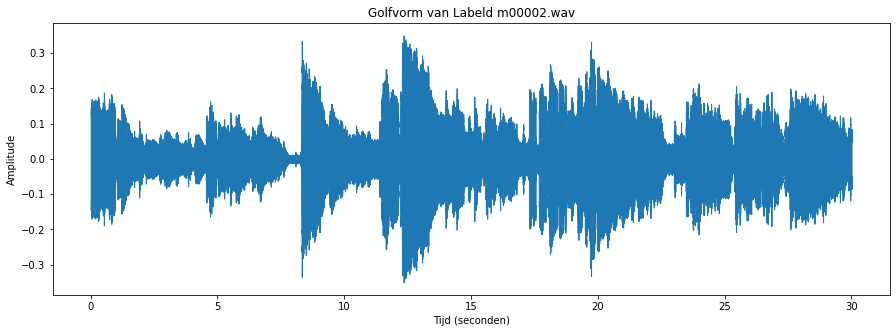

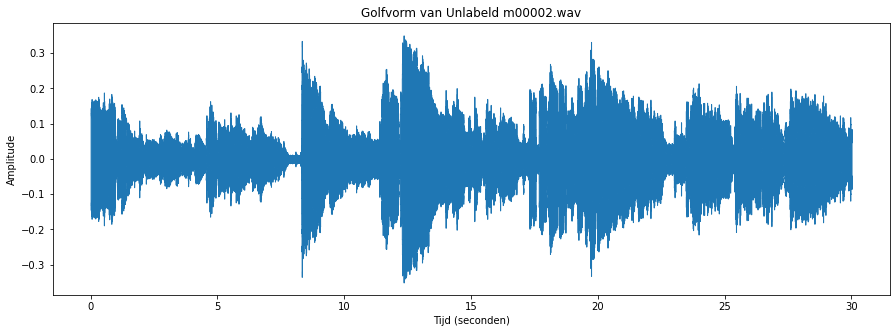

In [4]:
path = 'labeled'
path_un = 'unlabeled'

# Krijg de lijst van .wav-bestanden in de map 'labeled'
wav_bestanden = [f for f in os.listdir(path) if f.endswith('.wav')]

# Controleer of er ten minste één .wav-bestand is
if wav_bestanden:
    # Kies het eerste .wav-bestand
    eerste_bestandsnaam = wav_bestanden[0]
    bestandsnaam_volledig = os.path.join(path, eerste_bestandsnaam)

    # Laad de audio en de sample rate
    audio, sample_rate = librosa.load(bestandsnaam_volledig)

    # Plot de golfvorm
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title('Golfvorm van Labeld {}'.format(eerste_bestandsnaam))
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print("Geen .wav-bestanden gevonden in de map 'labeled'.")

wav_bestanden_un = [f for f in os.listdir(path_un) if f.endswith('.wav')]

if wav_bestanden_un:
    # Kies het eerste .wav-bestand
    eerste_bestandsnaam = wav_bestanden[0]
    bestandsnaam_volledig = os.path.join(path, eerste_bestandsnaam)

    # Laad de audio en de sample rate
    audio, sample_rate = librosa.load(bestandsnaam_volledig)

    # Plot de golfvorm
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title('Golfvorm van Unlabeld {}'.format(eerste_bestandsnaam))
    plt.xlabel('Tijd (seconden)')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print("Geen .wav-bestanden gevonden in de map 'labeled'.")

De golfvorm is een grafische weergave van geluid. Het laat zien hoe de luchtdruk anders is op een bepaald moment dan op een ander bepaald moment. 

Op de X-as staat de tijd in seconden hieraan kun je zien wanneer geluidsgolven plaats vinden.
Op de Y-as word de amplitude weergegeven, wat de drukvariatie in de lucht is, hoe hoger de golf des te luider het geluid. 

de golfvormen zijn opgeslagen als numerieke gegevens die dus de drukvariatie in de tijd weergeeft. Je kunt dus zien hoe geluid doorgaat over de tijd en je kunt eigenschappen van het geluid aflezen zoals de duur van het geluid. Dit is puur om een visueel beeld weer te geven om te zien waar je mee te maken hebt.

### Spectrogram

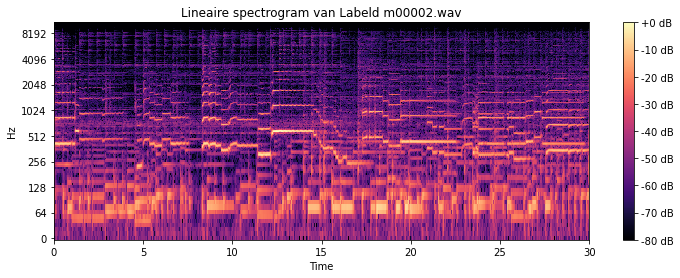

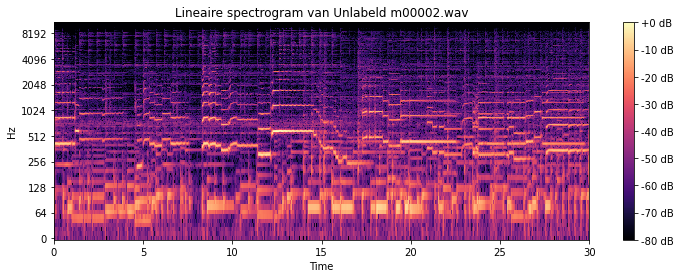

In [5]:
wav_bestanden = [f for f in os.listdir(path) if f.endswith('.wav')]

if wav_bestanden:
    eerste_bestandsnaam = wav_bestanden[0]
    bestandsnaam_volledig = os.path.join(path, eerste_bestandsnaam)
    y, sr = librosa.load(bestandsnaam_volledig)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Lineaire spectrogram van Labeld {}'.format(eerste_bestandsnaam))
    plt.show()
else:
    print("Geen .wav-bestanden gevonden in de map 'labeled'.")

wav_bestanden_un = [f for f in os.listdir(path_un) if f.endswith('.wav')]

if wav_bestanden_un:
    eerste_bestandsnaam = wav_bestanden[0]
    bestandsnaam_volledig = os.path.join(path, eerste_bestandsnaam)
    y, sr = librosa.load(bestandsnaam_volledig)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Lineaire spectrogram van Unlabeld {}'.format(eerste_bestandsnaam))
    plt.show()
else:
    print("Geen .wav-bestanden gevonden in de map 'labeled'.")


De functie librosa.display.specshow wordt gebruikt om het spectrogram weer te geven, en plt.colorbar zorgt voor de kleuren om de relatie van de amplitude aan te geven.

Een spectrogram is een representatie van de frequentie-inhoud. Dit word vaak gebruikt in muziekanalyses om de verandering in frequenties van een signaal over de tijd weer te geven. Het is erg handig om patronen in een frequentieverloop te vinden.

Op de X-as staat de tijd in seconden elke horizontale lijn is een kort tijdsinterval. De Y-as vertegenwoordigt de frequenties, een hoger punt is een hogere frequentie. De kleur op een punt geeft de energie van een signaal weer per frequentie. Waarbij de heldere kleuren hoge amplitudes zijn en donkere kleuren lage amplitudes zijn.

### Timbre 

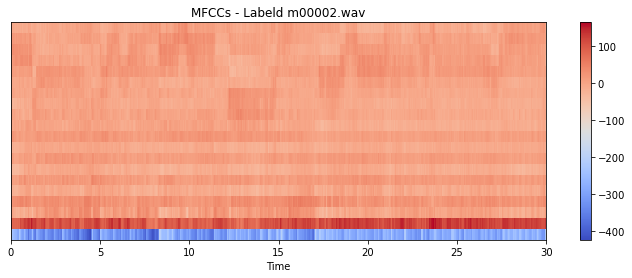

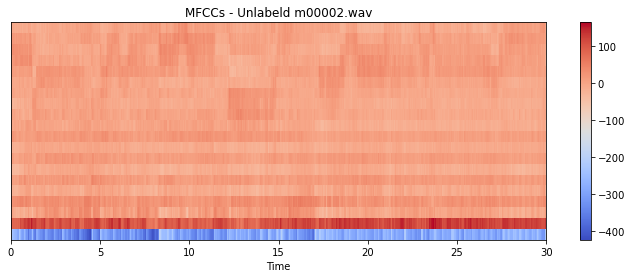

In [6]:
wav_bestanden = [f for f in os.listdir(path) if f.endswith('.wav')]

if wav_bestanden:
    eerste_bestandsnaam = wav_bestanden[0]
    bestandsnaam_volledig = os.path.join(path, eerste_bestandsnaam)

    y, sr = librosa.load(bestandsnaam_volledig)

    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs - Labeld {}'.format(eerste_bestandsnaam))
    plt.show()
else:
    print("Geen .wav-bestanden gevonden in de map 'labeled'.")
    
wav_bestanden_un = [f for f in os.listdir(path_un) if f.endswith('.wav')]

if wav_bestanden_un:
    eerste_bestandsnaam = wav_bestanden[0]
    bestandsnaam_volledig = os.path.join(path, eerste_bestandsnaam)

    y, sr = librosa.load(bestandsnaam_volledig)

    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs - Unlabeld {}'.format(eerste_bestandsnaam))
    plt.show()
else:
    print("Geen .wav-bestanden gevonden in de map 'labeled'.")

Timbre verwijst naar de kwaliteit van het geluid, het kan geluiden onderscheiden die dezelfde toon en intensiteit hebben, dus het kan het verschil tussen een gitaar en viool herkennen terwijl ze dezelfde toon spelen. Dit is dus een eigenschap die niet word bepaald door toonhoogte of sterkte van een geluid.

Hier gebruiken wij de Mel Frequency Ceptstral Coefficients (MFFC's) om het timbre te visualiseren. MFFC's zijn visualisaties van het spectrum van het geluidsignaal. Mel-Schaal is een schaal die is gemaakt om gehooreigenschappen beter weer te geven dan de lineare schaal. 

Met deze spectogram visualisatie kunnen we de tijdsafhankelijke veranderingen in het timbre waarnemen. Door MFCC's te bekijken krijg je dus een beeld van de eigenschappen van het audiobestand. Wat erg handig is bij het classificeren van muziekgenres

## Features

In [7]:
def calculate_tempo(audio_data, sample_rate):
    """
    Berekent het tempo van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - float: Het berekende tempo van het geluidssignaal.
    """
    tempo, _ = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
    return tempo

def calculate_chroma(audio_data, sample_rate):
    """
    Berekent de gemiddelde chroma van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - numpy.ndarray: Gemiddelde chroma.
    """
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    mean_chroma = np.mean(chroma, axis=1)
    return mean_chroma

def calculate_mfcc(audio_data, sample_rate):
    """
    Berekent de gemiddelde Mel Frequency Cepstral Coefficients (MFCCs) van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - numpy.ndarray: Gemiddelde MFCCs.
    """
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
    return mfcc.mean(axis = 1)

def calculate_spectral_centroid(audio_data, sample_rate):
    """
    Berekent het gemiddelde spectral centroid van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - float: Het gemiddelde spectrale centroid.
    """
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
    return spectral_centroid.mean()

def calculate_spectral_bandwidth(audio_data, sample_rate):
    """
    Bereken de gemiddelde spectrale bandwith van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - float: de gemiddelde spectral bandwith.
    """
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate)
    return spectral_bandwidth.mean()

def calculate_zero_crossing_rate(audio_data):
    """
    Berekent de gemiddelde zero crossing rate van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.

    Returns:
    - float: de gemiddelde zero crossing rate.
    """
    zero_crossings = librosa.feature.zero_crossing_rate(audio_data)
    return zero_crossings.mean()

def calculate_rms_energy(audio_data):
    """
    Berekent het gemiddelde RMS energy van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.

    Returns:
    - float: De gemiddelde RMS energy.
    """
    rms_energy = librosa.feature.rms(y=audio_data)
    return rms_energy.mean()

def calculate_spectral_rolloff(audio_data, sample_rate):
    """
    Berekent het gemiddelde spectral rolloff van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - float: Het gemiddelde spectrale rolloff.
    """
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate)
    return spectral_rolloff.mean()

def calculate_harmonic_to_noise_ratio(audio_data, sample_rate):
    """
    Berekent het gemiddelde harmonic to noise verhouding van een audio bestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - float: Het gemiddelde harmonic to noise verhouding.
    """
    y_harmonic, _ = librosa.effects.hpss(audio_data)
    harmonic_to_noise_ratio = np.mean(librosa.feature.spectral_contrast(y= y_harmonic, sr=sample_rate))
    return harmonic_to_noise_ratio

def calculate_tonnetz(audio_data, sample_rate):
    """
    Berekent de gemiddelde tonnetz van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - numpy.ndarray: Gemiddelde tonnetz.
    """
    tonnetz = librosa.feature.tonnetz(y=audio_data, sr=sample_rate)
    return tonnetz.mean(axis=1)

def calculate_spectral_contrast(audio_data, sample_rate):
    """
    Berekent de gemiddelde spectral contrast van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - numpy.ndarray: Gemiddelde spectral contrast.
    """
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
    return spectral_contrast.mean(axis=1)

def calculate_beats(audio_data, sample_rate):
    """
    Berekent de beat-tijdstippen van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - numpy.ndarray: Beat-tijdstippen.
    """
    tempo, beats = librosa.beat.beat_track(y=audio_data, sr=sample_rate)
    return beats

def process_audio_files(directory_path):
    """
    Verwerkt alle WAV-bestanden en geeft een DataFrame met de berekende functies.

    Parameters:
    - directory_path (str): Het pad naar de WAV-bestanden.

    Returns:
    - pandas.DataFrame: DataFrame met berekende functies voor elk WAV-bestand.
    """
    all_dfs = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            wav_path = os.path.join(directory_path, filename)

            sample_rate, audio_data = wavfile.read(wav_path)
            audio_data = audio_data.astype(np.float32) / np.iinfo(np.int16).max

            tempo = calculate_tempo(audio_data, sample_rate)
            df_tempo = pd.DataFrame({'Tempo': [tempo]})
            
            chroma = calculate_chroma(audio_data, sample_rate)
            df_chroma = pd.DataFrame({'Chroma{}'.format(i+1): [val] for i, val in enumerate(chroma)})

            mfcc = calculate_mfcc(audio_data, sample_rate)
            df_mfcc = pd.DataFrame({'MFCC{}'.format(i+1): [val] for i, val in enumerate(mfcc)})
            
            spectral_centroid = calculate_spectral_centroid(audio_data, sample_rate)
            df_spectral_centroid = pd.DataFrame({'SpectralCentroid': [spectral_centroid]})

            spectral_bandwidth = calculate_spectral_bandwidth(audio_data, sample_rate)
            df_spectral_bandwidth = pd.DataFrame({'SpectralBandwidth': [spectral_bandwidth]})

            zero_crossing_rate = calculate_zero_crossing_rate(audio_data)
            df_zero_crossing_rate = pd.DataFrame({'ZeroCrossingRate': [zero_crossing_rate]})

            rms_energy = calculate_rms_energy(audio_data)
            df_rms_energy = pd.DataFrame({'RMSEnergy': [rms_energy]})

            spectral_rolloff = calculate_spectral_rolloff(audio_data, sample_rate)
            df_spectral_rolloff = pd.DataFrame({'SpectralRolloff': [spectral_rolloff]})

            harmonic_to_noise_ratio = calculate_harmonic_to_noise_ratio(audio_data, sample_rate)
            df_harmonic_to_noise_ratio = pd.DataFrame({'HarmonicToNoiseRatio': [harmonic_to_noise_ratio]})
            
            tonnetz = calculate_tonnetz(audio_data, sample_rate)
            df_tonnetz = pd.DataFrame({'Tonnetz{}'.format(i+1): [val] for i, val in enumerate(tonnetz)})

            spectral_contrast = calculate_spectral_contrast(audio_data, sample_rate)
            df_spectral_contrast = pd.DataFrame({'SpectralContrast{}'.format(i+1): [val] for i, val in enumerate(spectral_contrast)})
            
            hertz = pd.DataFrame({'Hertz': [sample_rate]})
            
            song_name = os.path.splitext(filename)[0]
            df_tempo.index = [song_name]
            df_chroma.index = [song_name]
            df_mfcc.index = [song_name]
            df_spectral_centroid.index = [song_name]
            df_spectral_bandwidth.index = [song_name]
            df_zero_crossing_rate.index = [song_name]
            df_rms_energy.index = [song_name]
            df_spectral_rolloff.index = [song_name]
            df_harmonic_to_noise_ratio.index = [song_name]
            df_tonnetz.index = [song_name]
            df_spectral_contrast.index = [song_name]
            hertz.index = [song_name]


            df_combined = pd.concat([df_tempo, df_chroma, df_mfcc, df_spectral_centroid, df_spectral_bandwidth, df_zero_crossing_rate,
                                    df_rms_energy, df_spectral_rolloff, df_harmonic_to_noise_ratio, df_tonnetz,
                                     df_spectral_contrast, hertz], axis=1)

            all_dfs.append(df_combined)

    if all_dfs:
        final_df = pd.concat(all_dfs)
        return final_df


path = "labeled"
path_un = "unlabeled"

feature_df = process_audio_files(path)
feature_undf = process_audio_files(path_un)


In [8]:
feature_df.head(5)

,Tempo,Chroma1,Chroma2,Chroma3,Chroma4,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,...,Tonnetz5,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Hertz
m00002,129.199219,0.117655,0.133911,0.220483,0.188410,0.168177,0.193637,0.130628,0.203946,0.364396,...,-0.043709,-0.007959,19.667918,20.515668,26.072391,25.745788,23.396068,19.541725,34.600592,22050
m00039,135.999178,0.412044,0.333314,0.389580,0.370359,0.308951,0.386791,0.288708,0.329985,0.243529,...,0.016998,0.003116,19.964829,17.050832,21.109923,19.301231,20.553355,18.597363,38.304347,22050
m00041,95.703125,0.412797,0.537429,0.301002,0.379488,0.269635,0.380168,0.264904,0.303026,0.473597,...,0.012796,-0.016378,17.233857,14.865518,18.241217,18.563320,19.586907,17.007065,15.156099,22050
m00072,129.199219,0.286717,0.369671,0.274070,0.371768,0.311118,0.487252,0.551675,0.375336,0.508560,...,-0.004114,0.005338,29.752026,16.141935,18.926104,19.113687,19.466281,17.548978,15.208348,22050
m00096,123.046875,0.432902,0.321649,0.366385,0.344440,0.321556,0.335174,0.332990,0.352914,0.269636,...,0.005919,0.002178,16.843315,15.728975,19.023666,19.995101,19.370804,18.633169,43.553942,22050


In [9]:
feature_undf.head(5)

,Tempo,Chroma1,Chroma2,Chroma3,Chroma4,Chroma5,Chroma6,Chroma7,Chroma8,Chroma9,...,Tonnetz5,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Hertz
m00003,135.999178,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,...,-0.012761,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,22050
m00012,103.359375,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,...,-0.026224,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,22050
m00013,184.570312,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,...,-0.019523,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,22050
m00043,135.999178,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,...,0.021101,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,22050
m00044,143.554688,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,...,-0.020312,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,22050


### Uitleg Features

**Tempo (calculate_tempo):**

De functie calculate_tempo gebruikt de beat_track functie van de librosa library. Dit doet librosa door een methode genaamd "onset strength" te gebruiken.  De "onset strength" word afgeleid van het spectogram en meet de verandering in energie in de tijd. Nadat de "onset strength" is berekent worden punten gevonden waarop de "strength" toeneemt, deze punten heten "onset punten" en geven dus aan waar een verandering plaatsvind. En verandering gaat vaak samen met een beat of een noot. Na dat dit is berekend gebruikt librosa een methode om het tempo van de audio te schatten op basis van de berekende "onset strength". Het gaat opzoek naar patronen die overeen kunnen komen met een beat. De librosa functie analyseert dus het ritme om daarmee het tempo te berekenen. Het tempo word uitgedrukt als BPM wat beats per minute betekent dit wordt zo berekend: 
  
  Tempo = aantal beats per minuut. 
  
  Bronnen:

- LibROSA. (z.d.). beat_track — LibROSA documentation. Geraadpleegd op 10/1/2024, van https://librosa.org/doc/main/generated/librosa.beat.beat_track.html
- TwoEars. (z.d.). Onset Strength — TwoEars documentation documentatie. Geraadpleegd op 10/1/2024, van https://docs.twoears.eu/en/latest/afe/available-processors/onset-strength/#:~:text=Onset%20strength%20(%20onsetProc.-,m%20),originating%20from%20the%20same%20source.





**Gemiddelde Chroma (calculate_chroma):**

De functie calculate_chroma gebruikt de chroma_stft functie van de librosa library om het chromagram van de audio te berekenen, dit is de energie in muziektoon en word vaak gebruikt om de harmonische inhoud te analyseren. Het word berekent door eerst korte frames te maken waar een tijdelijke fft op word toegepast om zo de frequentie te krijgen. Vervolgens wordt het gemiddelde van het chromagram berekend over de tijd, wat een 12-dimensionale vector geeft die de gemiddelde toonhoogte intesiteit bevat.
Het chromagram is dus een representatie van de toonhoogtes in een lied. 

Chroma: Ci = 1/T ∑T, t=1  chroma(i,t).
Waarbij Ci de gemiddelde tijd intensiteit is. i,T het aantal tijdstappen en i,t de chroma intensiteit

Bronnen:

- OpenAI. (2024). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/a7cd344c-2979-4dd6-8069-e978d1f53be5
- LibROSA. (z.d.). chroma_stft — LibROSA documentation. Geraadpleegd op 10/1/2024, van
https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html





**Gemiddelde MFCC (calculate_mfcc):**

De functie calculate_mfcc berekent de Mel Frequency Cepstral Coefficients (MFCCs) met de librosa library. MFFCs zijn kenmerken die worden gebruikt bij het identificeren van muziekgenres. MFFCs worden berekend door filters te maken die overeenkomen met de Mel-schaal (Mel-schaal is een schaal die overeenkomt met hoe de mens geluid hoort). Hierna word een cepstrale analyse gedaan op de Mel audio, wat de tijd en frequenties geeft van een signaal, dit geeft een aantal coefficienten die aspecten van het audiogeluid representeren. Dus MFFC's bevatten kenmerken van de frequenties van de audio die goed past met hoe de mens geluid waar neemt. Hier wordt het gemiddelde genomen over de tijd om een 20-dimensionale vector van gemiddelde MFCCs te verkrijgen.

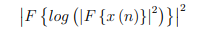

Bronnen:

- LibROSA. (z.d.). mfcc — LibROSA documentation. Geraadpleegd op 12/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.mfcc.html
- OpenAI. (2024). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/f20fda0d-1a3c-46d4-82f8-14e10b07a410
- Van Dalen, A. (z.d.). Universiteit Twente. Geraadpleegd op 19/1/2024, van https://essay.utwente.nl/76916/1/A%20van%20Dalen_BA_RAM.pdf



**Gemiddelde Spectrale Centroid (calculate_spectral_centroid):**

De functie calculate_spectral_centroid berekent het gemiddelde spectrale centroid met de librosa library. Spectral centroid is een maat voor de gemiddelde frequentie in een spectrum. Librosa berekend het frequentiespectrum van de audio, dit spectrum geeft de intensiteit van de frequentie. Hierna word vaak een fft gebruikt om de intensiteit van de frequenties te bepalen. Uiteindelijk word de spectrale centroid berekend door het gewogen gemiddelde te nemen van de frequenties. Een lage spectrale centroid laat zien dat de energie in lage frequenties ligt en bij een hogere concentratie de energie in de hogere frequenties ligt. Het spectrale centroid geeft dus aan waar het "zwaartepunt" van de frequenties in een audiobestand zit.

Wiskundige formule spectrale centroid:
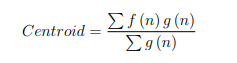

 Bronnen:
- LibROSA. (z.d.). spectral_centroid — LibROSA documentation. Geraadpleegd op 16/1/2024, van https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html
- Wikipedia. (z.d.). Spectral centroid. In Wikipedia. Geraadpleegd op 16/12024, van https://en.wikipedia.org/wiki/Spectral_centroid
- Van Dalen, A. (z.d.). Universiteit Twente. Geraadpleegd op 19/1/2024, van https://essay.utwente.nl/76916/1/A%20van%20Dalen_BA_RAM.pdf

**Gemiddelde Spectrale Bandbreedte (calculate_spectral_bandwidth):**

De functie calculate_spectral_bandwidth berekent de gemiddelde spectrale bandbreedte met de librosa library. De spectrale bandbreedte is een maat voor de breedte van een frequentiespectrum  en geeft aan hoe verspreid de componenten zijn. Hoe hoger de spectrale bandbreedte hoe breder het frequentiespectrum is. Net als bij de spectral centroid word het frequentiespectrum uitgerekend, daarna word voor elk tijdvenster de intensiteiten bepaald door een fft en uiteindelijk word de spectral bandwith berekend door de intensiteiten.

Wiskundige formule spectrale bandbreedte:
SB= WORTEL( (∑f(f-SC)^2 *magnitude(f)) / ((∑f magnitude (f))
waarbij f de frequentie is en SC spectrale centroid is.

Bronnen:
- LibROSA. (z.d.). spectral_bandwidth — LibROSA documentation. Geraadpleegd op 16/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html

**Gemiddelde Zero-Crossing Rate (calculate_zero_crossing_rate):**

De functie calculate_zero_crossing_rate berekent de gemiddelde zero-crossing rate van het geluidssignaal met de librosa library. Zero crossing rate is een eigenschap van een signaal en laat zien hoeveel keer het signaal door de nul gaat. Dit word vaak gebruikt in muziekgenre voorspellen. Hoe hoger de zero crossing rate hoe hoger de variatie is in het signaal. Librosa kijkt naar de amplitude van het signaal, hiermee telt librosa hoeveel keer het door de 0 gaat. In bepaalde muziekgenres kan de zero crossing rate laten zien wat de ritmische dichtheid is van de audio. 

Wiskundige formule Zero-Crossing Rate:
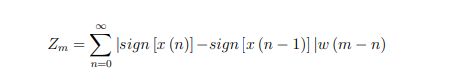

Bronnen: 
- LibROSA. (z.d.). zero_crossing_rate — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html
- OpenAI. (z.d.). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/61b340b8-f4cd-49e4-bda3-53bc2a76bb0b
- Van Dalen, A. (z.d.). Universiteit Twente. Geraadpleegd op 19/1/2024, van https://essay.utwente.nl/76916/1/A%20van%20Dalen_BA_RAM.pdf




**Gemiddelde RMS Energie (calculate_rms_energy):**

De functie calculate_rms_energy berekent het gemiddelde Root Mean Square (RMS) energie met de librosa library. RMS energie laat zien wat het gemiddelde energieniveau is van de audio. Dit doet librosa eerst door de vierkantwaarden te berekenen, hiermee word elke waarde gekwadrateerd. Hierdoor worden negatieve waardes positief, hiermee legt het de nadruk op grote amplitudes.
Daarna word het gemiddelde van de waarden genomen en hierop word de vierkantswortel toegepast waardoor je de RMS energie krijgt.

Wiskundige formule RMS energie:
RMS energie = Wortel 1/T ∑T,t=1 amplitude(t)^2
waarbij T het aantal tijdstappen is

Bronnen: 
-LibROSA. (z.d.). rms — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.rms.html

**Gemiddelde Spectrale Rolloff (calculate_spectral_rolloff):**

De functie calculate_spectral_rolloff berekent het gemiddelde spectrale rolloff met de librosa library. Spectral rolloff geeft de frequentie aan waarbij een bepaald percentage van de totale spectrale energie is bereikt. Het spectrale rolloff word berekend als het punt waarbij het kwadraat van de spectrale amplitude een bepaald percentage van de totale energie heeft geraakt. Vaak word 85% gebruikt, omdat dit het de centrale frequentie geeft van het spectrum. Het word berekend door eerst het frequentiespectrum te berekenen en hierna word de spectrale rolloff berekend.

Wiskundige formule spectrale rolloff:
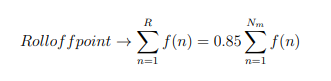

Bronnen:
- LibROSA. (z.d.). spectral_rolloff — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html
- Van Dalen, A. (z.d.). Universiteit Twente. Geraadpleegd op 19/1/2024, van https://essay.utwente.nl/76916/1/A%20van%20Dalen_BA_RAM.pdf



**Gemiddelde Harmonic-to-Noise Ratio (calculate_harmonic_to_noise_ratio):**

De functie calculate_harmonic_to_noise_ratio berekent het gemiddelde harmonic-to-noise ratio met de librosa library. Het is een maat die wordt gebruikt om evenwicht tussen harmonische en ruis componenten te laten zien. Het kan belangrijk zijn, omdat menselijke stemmen bestaan uit trillingen met harmonische relaties. Harmonic-to-noise ratio wordt gebruikt om de zuiverheid van deze harmonische compenten te meten. Er zijn verschillende manieren om HNR te benaderen, de spectrale flux kan bijvoorbeeld informatie geven over de veranderingen in de energie, terwijl MFFC's gebruikt word om spraak te filteren.

Wiskundige formule HNR:
HNR = 1/T ∑T, t=1 spectralcontrast (harmonic)(t)
waarbij T het aantal tijdstappen is

Bronnen:
- LibROSA. (z.d.). hpss — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.effects.hpss.html


**Gemiddelde Tonnetz (calculate_tonnetz):**

De functie calculate_tonnetz berekent het gemiddelde tonnetz met de librosa library. Tonnetz zijn de harmonische relaties tussen tonen. De akkoorden en toonhoogtes worden hier weergegeven in een driedimensionale ruimte. Dit laat de tonale relaties zien. Ook kan je de harmonische intervallen tussen tonen vinden. Het begint eerst met het berekenen van het harmonische spectrum, hierna worden de tonnetz-coordinaten toegewezen in het spectrum. De echte tonnetz-coordinaten worden berekend op basis van de toegewezen frequenties en hun coordinaten in de tonnetzruimte.


Wiskundige formule Tonnetz: 
TNi =  1/T ∑T, t=1 tonnetz(i,t)
waarbij TNi de gemiddelde waarde is van de tonnetz functie, T het aantal tijdstappen is en tonnetz(i,t) de tonnetz functie op tijdstap t.

Bronnen:
- OpenAI. (z.d.). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/57483d6b-4bcc-470c-90d7-92c3ad70d7ff
- LibROSA. (z.d.). tonnetz — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.tonnetz.html

**Gemiddelde Spectrale Contrast (calculate_spectral_contrast):**
De functie calculate_spectral_contrast berekent het gemiddelde spectrale contrast met de librosa library. Het geeft de mate van contrast tussen de pieken en dalgebieden in het spectrale spectrum aan. Het is het verschil tussen verschillende frequenties, hoge spectrale contrasten zijn grote verschillen in energieniveaus en lage contrasten zijn bijna geen verschillen in energieniveaus. Om dit te berekenen verdeel je het frequentiespectrum in frequentie banden, hierna bereken je de gemiddeldes van de energie, je kunt door het maximum te nemen de piekenergie vinden en door het minum te nemen de dalenergie. Dit doe je min elkaar en dan heb je het spectrale contrast


Wiskundige formule spectrale contrast: 
SCi = (∑f contrast(i,f) * magnitude(f)) / (∑f magnitude(f))
Waarbij SCi de gemiddelde waarde is van het spectrale contrast en f de frequentie is.

Bronnen:
- LibROSA. (z.d.). spectral_contrast — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.spectral_contrast.html
- Rossignol, S., & Cromwell, H. C. (2002). Geraadpleegd op 18/1/2024, https://doi.org/10.1016/s0167-6393(02)00057-2


**Beat-tijdstippen (calculate_beats):**

De functie calculate_beats berekent de beat-tijdstippen van het geluidssignaal met behulp van de librosa library. Hier rekenen wij niet het tempo uit (dit hebben wij boven al gedaan), maar de tijdstippen van de beats. De beat-frames laat de ritmische patronen zien van een muziekstuk dit is erg belangrijk voor het voorspellen van muziekgenre.

bronnen:
- LibROSA. (z.d.). beat_track — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.beat.beat_track.html

## CENS

In [10]:
def calculate_cens_features(audio_data, sample_rate):
    """
    Berekent CENS functies van een audiobestand.

    Parameters:
    - audio_data (numpy.ndarray): Het geluidssignaal.
    - sample_rate (int): De sample rate van het geluidssignaal.

    Returns:
    - numpy.ndarray: array met genormaliseerde gemiddelde en standaardafwijking van CENS-functies.
    """
    chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)

    normalized_energy = librosa.util.normalize(chromagram, axis=0)

    cens_features = np.vstack([np.mean(normalized_energy, axis=1), np.std(normalized_energy, axis=1)])

    cens_features_flat = cens_features.flatten()

    return cens_features_flat

def process_cens(directory_path):
    """
    Verwerkt alle WAV-bestanden en geeft een DataFrame met CENS-functies.

    Parameters:
    - directory_path (str): Het pad naar de WAV-bestanden.

    Returns:
    - pandas.DataFrame: DataFrame met CENS-functies voor elk WAV-bestand.
    """
    all_dfs = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):
            wav_path = os.path.join(directory_path, filename)

            sample_rate, audio_data = wavfile.read(wav_path)
            audio_data = audio_data.astype(np.float32) / np.iinfo(np.int16).max

            cens_features = calculate_cens_features(audio_data, sample_rate)

            song_name = os.path.splitext(filename)[0]

            column_names = [f'CENS_{i}' for i in range(len(cens_features))]

            df = pd.DataFrame([cens_features], columns=column_names, index=[song_name])

            all_dfs.append(df)

    if all_dfs:
        final_df = pd.concat(all_dfs)
        return final_df

path = "labeled"
path_un = "unlabeled"


cens_df = process_cens(path)
cens_undf = process_cens(path_un)

Hier berekenen wij de CENS dit staat voor Constant-Q Chromagram Energy Normalized Statistics. Het is handig voor muziekgenre voorspellen, omdat robuust is tegen veranderingen in toonhoogte, volume en dynamiek en het helpt met het vinden van melodische aspecten van de muziek. Constant-Q Chromagram is een chromagram wat gebruikt maakt van Constant-Q, hiermee worden de frequenties logaritmisch verdeeld en dit helpt weer bij het vastleggen van de toonhoogte van tonen. Hierna word de chromagram ook genormaliseerd zodat het minder gevoelig is voor volume, zodat het meer gefoccust is op de melodie van de muziek. De laatste stap is om het gemiddelde en std uit te rekenen over de genormaliseerde energie. CENS kan goed gebruikt worden samen met MFCCs. 

Wiskundige formules:
Chromagram(t,n) = ∑frames |STFT(t,n)|^2
hier is t de tijd, STFT staat four short-time fourier transform en n de index.

Genormaliseerde_energie(t,n) = (chromagram(t,n)) / (∑all bins chromagram(t,n))

gemiddelde energie(n) = 1/T ∑frames Genormaliseerde_energie(t,n)
std energie(n) = WORTEL 1/T ∑frames (Genormaliseerde_energie(t,n) - gemiddelde energie(n))^2

bronnen:
- OpenAI. ChatGPT: Language Model by OpenAI. geraadpleegd op 21/1/2024 https://chat.openai.com/share/fb04c19c-780a-48ef-9b36-2a35e4569039
- librosa.feature.chroma_stft. (n.d.). LibROSA Documentation. geraadpleegd op 21/1/2024 van https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html

In [11]:
superdf = pd.concat([cens_undf, feature_undf], axis = 1)
superdf.head(10)

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz5,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Hertz
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.012761,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,22050
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,-0.026224,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,22050
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,-0.019523,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,22050
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,0.021101,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,22050
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.020312,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,22050
m00055,0.308940,0.418923,0.317481,0.317869,0.495308,0.381529,0.407861,0.321004,0.401796,0.483401,...,0.021987,0.044520,24.412629,17.589618,21.201438,20.587069,21.338418,19.083820,16.459585,22050
m00061,0.378747,0.342769,0.419572,0.443366,0.550129,0.514991,0.522471,0.549509,0.451431,0.383654,...,0.000756,-0.008896,17.778284,15.514382,15.290346,15.683375,15.583587,17.171288,40.688193,22050
m00063,0.523615,0.597753,0.653445,0.589031,0.625700,0.589588,0.527575,0.600005,0.691375,0.609115,...,-0.000346,-0.009712,20.449686,13.472445,14.624060,15.147004,16.280411,18.397797,39.898948,22050
m00069,0.153987,0.300343,0.299983,0.405683,0.282089,0.119845,0.154698,0.264673,0.207389,0.292909,...,0.047237,-0.003089,16.180115,20.926335,24.046660,23.246691,23.753461,20.913284,26.348253,22050
m00074,0.179625,0.249873,0.655830,0.239777,0.225172,0.278858,0.316529,0.542954,0.221782,0.321671,...,-0.016432,-0.033303,18.156364,16.625324,20.351860,21.561308,23.611416,22.422523,20.274100,22050


In [12]:
super_labeldf = pd.concat([cens_df, feature_df], axis = 1)
super_labeldf.head(10)

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz5,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Hertz
m00002,0.117655,0.133911,0.220483,0.188410,0.168177,0.193637,0.130628,0.203946,0.364396,0.287584,...,-0.043709,-0.007959,19.667918,20.515668,26.072391,25.745788,23.396068,19.541725,34.600592,22050
m00039,0.412044,0.333314,0.389580,0.370359,0.308951,0.386791,0.288708,0.329985,0.243529,0.297682,...,0.016998,0.003116,19.964829,17.050832,21.109923,19.301231,20.553355,18.597363,38.304347,22050
m00041,0.412797,0.537429,0.301002,0.379488,0.269635,0.380168,0.264904,0.303026,0.473597,0.332073,...,0.012796,-0.016378,17.233857,14.865518,18.241217,18.563320,19.586907,17.007065,15.156099,22050
m00072,0.286717,0.369671,0.274070,0.371768,0.311118,0.487252,0.551675,0.375336,0.508560,0.282717,...,-0.004114,0.005338,29.752026,16.141935,18.926104,19.113687,19.466281,17.548978,15.208348,22050
m00096,0.432902,0.321649,0.366385,0.344440,0.321556,0.335174,0.332990,0.352914,0.269636,0.244928,...,0.005919,0.002178,16.843315,15.728975,19.023666,19.995101,19.370804,18.633169,43.553942,22050
m00102,0.258693,0.249862,0.236609,0.197587,0.472781,0.232474,0.371331,0.196570,0.125784,0.195981,...,0.008853,-0.006430,19.732631,20.660649,24.891295,25.228981,24.046096,20.661756,15.883361,22050
m00112,0.378679,0.367845,0.316793,0.319376,0.416425,0.500265,0.684889,0.593863,0.457227,0.438199,...,-0.014402,0.069186,19.556522,16.010705,19.282133,18.457368,18.544595,17.628149,14.779563,22050
m00138,0.471198,0.406847,0.534343,0.453654,0.480180,0.323221,0.367575,0.379298,0.332855,0.385703,...,-0.001123,0.001304,22.082768,16.001606,19.436784,18.890510,17.877723,17.499372,38.056440,22050
m00192,0.187188,0.390006,0.580011,0.324703,0.334755,0.275796,0.259022,0.347530,0.421593,0.429722,...,-0.017853,-0.034931,17.178424,14.227128,18.463324,19.850169,20.714608,20.557243,21.250464,22050
m00206,0.578105,0.512654,0.517722,0.524371,0.550819,0.555874,0.571483,0.608631,0.638450,0.606215,...,-0.001340,0.001326,18.530652,13.421352,15.209878,15.029934,15.226035,15.744278,42.760727,22050


In [13]:
df['filename'] = df['filename'].str.replace(".wav", "")
df.set_index('filename', inplace = True)

C:\Users\caspe\AppData\Local\Temp\ipykernel_3540\4033440298.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['filename'] = df['filename'].str.replace(".wav", "")


In [14]:
super_labeldf['genre'] = df['genre']

In [15]:
super_labeldf

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Hertz,genre
m00002,0.117655,0.133911,0.220483,0.188410,0.168177,0.193637,0.130628,0.203946,0.364396,0.287584,...,-0.007959,19.667918,20.515668,26.072391,25.745788,23.396068,19.541725,34.600592,22050,jazz
m00039,0.412044,0.333314,0.389580,0.370359,0.308951,0.386791,0.288708,0.329985,0.243529,0.297682,...,0.003116,19.964829,17.050832,21.109923,19.301231,20.553355,18.597363,38.304347,22050,reggae
m00041,0.412797,0.537429,0.301002,0.379488,0.269635,0.380168,0.264904,0.303026,0.473597,0.332073,...,-0.016378,17.233857,14.865518,18.241217,18.563320,19.586907,17.007065,15.156099,22050,pop
m00072,0.286717,0.369671,0.274070,0.371768,0.311118,0.487252,0.551675,0.375336,0.508560,0.282717,...,0.005338,29.752026,16.141935,18.926104,19.113687,19.466281,17.548978,15.208348,22050,disco
m00096,0.432902,0.321649,0.366385,0.344440,0.321556,0.335174,0.332990,0.352914,0.269636,0.244928,...,0.002178,16.843315,15.728975,19.023666,19.995101,19.370804,18.633169,43.553942,22050,disco
m00102,0.258693,0.249862,0.236609,0.197587,0.472781,0.232474,0.371331,0.196570,0.125784,0.195981,...,-0.006430,19.732631,20.660649,24.891295,25.228981,24.046096,20.661756,15.883361,22050,classical
m00112,0.378679,0.367845,0.316793,0.319376,0.416425,0.500265,0.684889,0.593863,0.457227,0.438199,...,0.069186,19.556522,16.010705,19.282133,18.457368,18.544595,17.628149,14.779563,22050,reggae
m00138,0.471198,0.406847,0.534343,0.453654,0.480180,0.323221,0.367575,0.379298,0.332855,0.385703,...,0.001304,22.082768,16.001606,19.436784,18.890510,17.877723,17.499372,38.056440,22050,reggae
m00192,0.187188,0.390006,0.580011,0.324703,0.334755,0.275796,0.259022,0.347530,0.421593,0.429722,...,-0.034931,17.178424,14.227128,18.463324,19.850169,20.714608,20.557243,21.250464,22050,classical
m00206,0.578105,0.512654,0.517722,0.524371,0.550819,0.555874,0.571483,0.608631,0.638450,0.606215,...,0.001326,18.530652,13.421352,15.209878,15.029934,15.226035,15.744278,42.760727,22050,hiphop


In [16]:
testdf = superdf.copy()

In [17]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=0.01,  
    max_df=0.9,  
    max_features=5000,
    ngram_range=(1, 2)
)

tfidf = tfidf_vectorizer.fit_transform(testdf)

tfidf_fn = tfidf_vectorizer.get_feature_names_out()

nmf = NMF(n_components=3, 
    random_state=42
).fit(tfidf)

nmf_features = nmf.transform(tfidf)

norm_features = normalize(nmf_features)

df_nmf = pd.DataFrame(norm_features, index = tfidf_fn)

comp_words = pd.DataFrame(nmf.components_).T
comp_words['Words'] = tfidf_fn

topic_dict = {}
for col in range(0,3):
    topn = list(comp_words.sort_values(col, ascending=False)['Words'].head(7))
    topic_dict[col] = topn
    
lowest_terms_dict = {}

for col in range(0, 3):
    lowest_terms = list(comp_words.sort_values(col, ascending=True)['Words'].head(7))
    lowest_terms_dict[col] = lowest_terms

topic_dict

C:\Users\caspe\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


{0: ['cens_6', 'mfcc17', 'chroma1', 'cens_18', 'chroma2', 'mfcc12', 'mfcc15'],
 1: ['cens_7',
  'spectralcontrast7',
  'cens_2',
  'harmonictonoiseratio',
  'mfcc6',
  'hertz',
  'mfcc8'],
 2: ['mfcc20', 'chroma6', 'cens_17', 'mfcc2', 'cens_10', 'mfcc19', 'chroma4']}

topic_dict geeft ons een dictionary met de NMF kenmerken.  De lijsten in de dictionary laten zien welke features het meest bijdragen aan het model.

In [18]:
lowest_terms_dict

{0: ['cens_0',
  'chroma8',
  'chroma9',
  'harmonictonoiseratio',
  'hertz',
  'tonnetz6',
  'mfcc10'],
 1: ['mfcc1', 'chroma5', 'chroma6', 'chroma7', 'tonnetz1', 'tempo', 'mfcc11'],
 2: ['cens_0',
  'chroma8',
  'chroma9',
  'harmonictonoiseratio',
  'hertz',
  'tonnetz6',
  'mfcc10']}

Lowest_terms_dict geeft ons ook een dictionary met de NMF kenmerken.  De lijsten in de dictionary laten zien welke features het minst bijdragen aan het model.

In [19]:
superdf.columns

Index(['CENS_0', 'CENS_1', 'CENS_2', 'CENS_3', 'CENS_4', 'CENS_5', 'CENS_6',
       'CENS_7', 'CENS_8', 'CENS_9', 'CENS_10', 'CENS_11', 'CENS_12',
       'CENS_13', 'CENS_14', 'CENS_15', 'CENS_16', 'CENS_17', 'CENS_18',
       'CENS_19', 'CENS_20', 'CENS_21', 'CENS_22', 'CENS_23', 'Tempo',
       'Chroma1', 'Chroma2', 'Chroma3', 'Chroma4', 'Chroma5', 'Chroma6',
       'Chroma7', 'Chroma8', 'Chroma9', 'Chroma10', 'Chroma11', 'Chroma12',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13', 'MFCC14', 'MFCC15',
       'MFCC16', 'MFCC17', 'MFCC18', 'MFCC19', 'MFCC20', 'SpectralCentroid',
       'SpectralBandwidth', 'ZeroCrossingRate', 'RMSEnergy', 'SpectralRolloff',
       'HarmonicToNoiseRatio', 'Tonnetz1', 'Tonnetz2', 'Tonnetz3', 'Tonnetz4',
       'Tonnetz5', 'Tonnetz6', 'SpectralContrast1', 'SpectralContrast2',
       'SpectralContrast3', 'SpectralContrast4', 'SpectralContrast5',
       'SpectralContrast6'

In [20]:
superdf.drop(['Tempo', 'SpectralCentroid', 'SpectralBandwidth', 'RMSEnergy', 'Hertz'], axis =1, inplace = True)

Hier droppen we we features die het minst waard zijn volgens lowest_terms_dict, we laten wel de MFFC's erin, omdat wij denken dat het toch een belangrijke invloed heeft.

## Dataframe zonder labels

## Elbow Method

C:\Users\caspe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


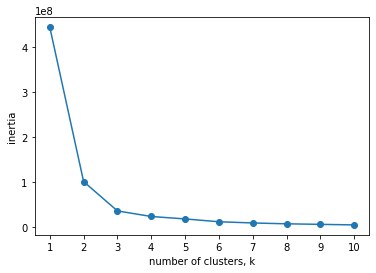

In [21]:
inertia = []
k = range(1, 11)

for i in k:
    model = KMeans(n_clusters=i, n_init=10)
    model.fit(superdf)
    inertia.append(model.inertia_)

plt.plot(k, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

In de lijst Inertia word de interie, wat betekent dat de som van kwadraten van de afstanden van elk punt in een cluster tot het centrum van dat cluster word opgeslagen in waarden van k(aantal clusters). Dit geeft aan wat de "dichtheid" is van de clusters.
Er word een lus uitgevoerd van 1 tot 10 en binnen die lus wordt een Kmeans-model gebruikt. 

for i in k: Hier wordt een lus uitgevoerd voor elk getal i in het bereik van 1 tot 10 (het aantal clusters dat wordt overwogen). Hierna word een grafiek gemaakt met de inertia op de Y-as en de Clusters op de X-as, het doel hiervan is om de elleboog te vinden dit word gezien als het optimale aantal clusters in ons geval is dat 3.

## Eigenwaarden

C:\Users\caspe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


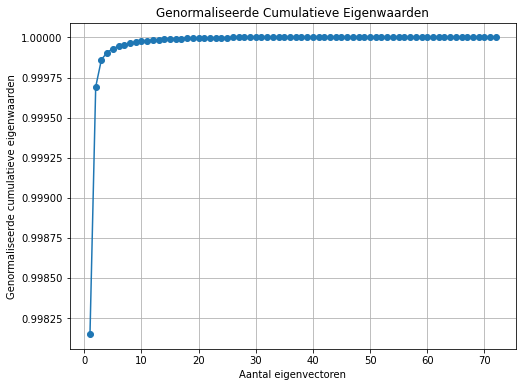

In [22]:
eigenvals = np.linalg.eigvals(superdf.cov())
normalized_cumulative_eigenvals = np.cumsum(eigenvals) / np.sum(eigenvals)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(normalized_cumulative_eigenvals) + 1), normalized_cumulative_eigenvals, marker='o')
plt.xlabel('Aantal eigenvectoren')
plt.ylabel('Genormaliseerde cumulatieve eigenwaarden')
plt.title('Genormaliseerde Cumulatieve Eigenwaarden')
plt.grid(True)
plt.show()

C:\Users\caspe\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


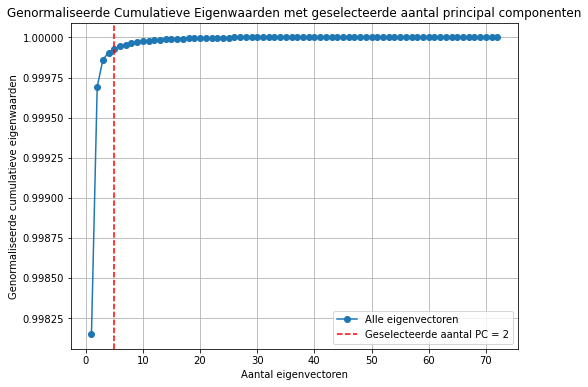

In [23]:
cov_matrix = superdf.cov()

eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvals)[::-1]
sorted_eigenvals = eigenvals[sorted_indices]
sorted_eigenvecs = eigenvecs[:, sorted_indices]


plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(normalized_cumulative_eigenvals) + 1), normalized_cumulative_eigenvals, marker='o', label='Alle eigenvectoren')
plt.axvline(x=5, color='red', linestyle='--', label=f'Geselecteerde aantal PC = 2')
plt.xlabel('Aantal eigenvectoren')
plt.ylabel('Genormaliseerde cumulatieve eigenwaarden')
plt.title('Genormaliseerde Cumulatieve Eigenwaarden met geselecteerde aantal principal componenten')
plt.legend()
plt.grid(True)
plt.show()

Eigenwaarden en eigenvectoren worden vaak gebruikt bij machine learning om gegevens te analyseren. Hier word het gebruikt om een grafiek te visualiseren die mogelijk een scherpe knik heeft, deze knik laat zien dat daar al het meeste variatie ligt in ons geval is dit 5 en geeft dus aan dat er 5 eigenvectoren zijn die de meeste variatie geven. De eigenwaarde beschrijft dus hoeveel variantie bij elkaar door een factor word verklaad. Deze weergave kan weer gebruikt worden bij de PCA. Het belangrijke van deze code is dus dat het aangeeft hoeveel eigenvectoren behouden moeten worden.

bron :
- Wikipedia. (z.d.). Eigenwaarde (wiskunde). In Wikipedia. Geraadpleegd op 21/1/2024, van https://nl.wikipedia.org/wiki/Eigenwaarde_(wiskunde)

# PCA

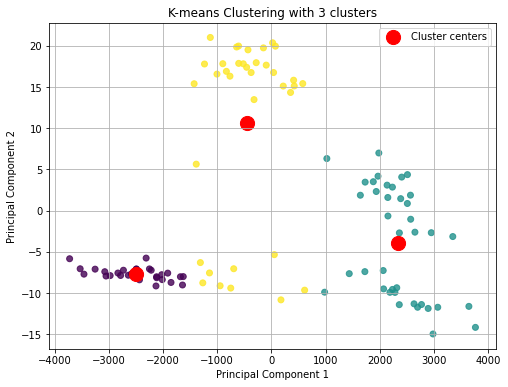

In [24]:
numeric_columns = superdf.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.dropna()

pca = PCA(n_components=4)
principal_components = pca.fit_transform(numeric_columns)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(principal_components)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, color='red', label='Cluster centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering with {num_clusters} clusters')
plt.legend()
plt.grid(True)
plt.show()


Een Principale Componentenanalyse (PCA) is een techniek die gebruikt word voor het verminderen van dimensies in gegevens. Het eerste wat een PCA doet is de richtingen van de gegevens bekijken waar de variatie het grootst is  dit wordt bepaald door de eigenvectoren. De transformatie geeft nieuwe waardes op basis van hoeveel ze bijdragen aan de variatie in de gegevens de minder belangrijke gegevens kunnen genegeerd worden. De PCA maakt een visualisatie om relaties van de gegevens waar te nemen.
Hierna kan PCA gebruikt worden voor het binden van de meest belangrijke features die de meeste variatie hebben.

bron:
- DataCamp. (z.d.). Principal Component Analysis in Python. Geraadpleegd op 20/1/2024, van https://www.datacamp.com/tutorial/principal-component-analysis-in-python

In [25]:
df_viz = superdf.copy()

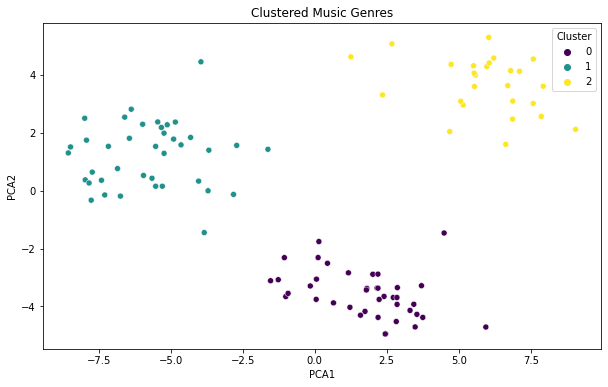

In [26]:
features_columns = df_viz

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_viz)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_viz['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=4)
cluster_visualization = pca.fit_transform(scaled_data)

df_viz['PCA1'] = cluster_visualization[:, 0]
df_viz['PCA2'] = cluster_visualization[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_viz, palette='viridis', legend='full')
plt.title('Clustered Music Genres')
plt.show()

# Kmeans en TSNE 

In [27]:
df_kmean_tsne = superdf.copy()

C:\Users\caspe\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\caspe\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


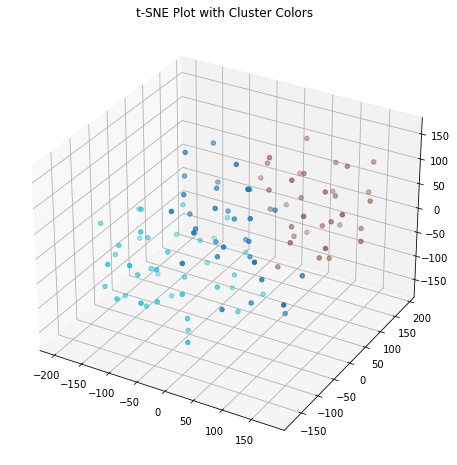

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz5,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.012761,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,0
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,-0.026224,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,2
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,-0.019523,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,0
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,0.021101,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,0
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.020312,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,0.013385,-0.013989,17.927492,14.882813,19.215796,20.529571,21.981498,21.666280,17.207332,1
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.004224,-0.002690,20.139989,15.154152,19.015372,19.193349,17.649666,17.269376,15.490463,2
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,-0.024908,-0.035701,20.434572,17.928657,18.590920,17.471387,17.419409,15.520504,14.757942,2
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,0.019240,0.075332,20.021781,22.180632,23.500862,23.568185,23.957510,22.693431,26.871295,0


In [28]:
numeric_cols = df_kmean_tsne.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df_kmean_tsne[numeric_cols]

tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(numeric_data)

num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_result)

tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_df['Cluster'] = cluster_labels

tsne_df.reset_index(drop=True, inplace=True)

df_kmean_tsne['Cluster'] = cluster_labels

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], tsne_df['Dimension 3'], c=tsne_df['Cluster'], cmap='tab10')
ax.set_title('t-SNE Plot with Cluster Colors')
plt.show()

display(df_kmean_tsne)


In [30]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_kmean_tsne.groupby('Cluster').mean()

cluster_genre_mapping = {}

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).abs().sum(axis=1)
    closest_genre = distances.idxmin()
    cluster_genre_mapping[cluster_index] = closest_genre

df_kmean_tsne['genre'] = df_kmean_tsne['Cluster'].map(cluster_genre_mapping)

display(df_kmean_tsne)


,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster,genre
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,0,rock
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,2,pop
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,0,rock
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,0,rock
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,1,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,-0.013989,17.927492,14.882813,19.215796,20.529571,21.981498,21.666280,17.207332,1,classical
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,-0.002690,20.139989,15.154152,19.015372,19.193349,17.649666,17.269376,15.490463,2,pop
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,-0.035701,20.434572,17.928657,18.590920,17.471387,17.419409,15.520504,14.757942,2,pop
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,0.075332,20.021781,22.180632,23.500862,23.568185,23.957510,22.693431,26.871295,0,rock


Hier laten we aan de hand van een heatmap de Distance van de clusters zien. Zo kan je zien hoe paarser het is. Hoe dichterbijer de cluster is. Daarom kunnen we zien dat cluster 2 duidelijk pop is, 1 classical maar 0 kan heel veel zijn.

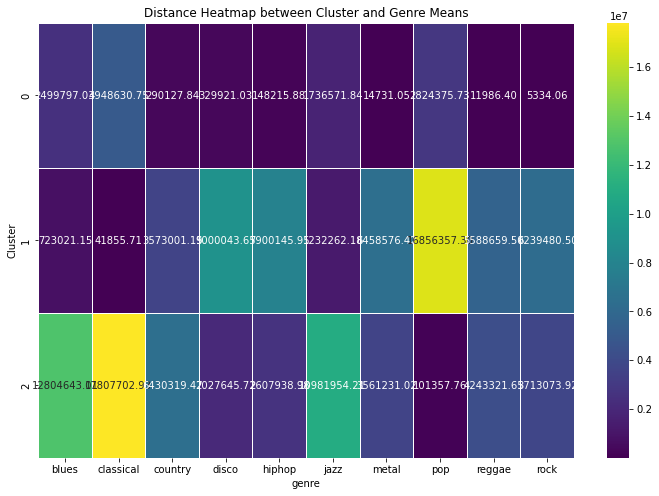

In [31]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_kmean_tsne.groupby('Cluster').mean()

distances_df = pd.DataFrame(index=cluster_means.index, columns=genre_means.index)

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).pow(2).sum(axis=1)
    distances_df.loc[cluster_index] = distances

distances_df = distances_df.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(distances_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Distance Heatmap between Cluster and Genre Means')
plt.show()

t-SNE is een dimensiereductie techniek. Het wordt gebruikt om hoge dimensionale data te visualiseren in een laag dimensionale ruimte. Dit zijn vaak 2 of 3 dimensies. Er wordt eerst een afstandmatrix gemaakt. Hier berekent het in welke mate elk paar punten vergelijken met elkaar worden. Daarna wordt een kansenmatrix gemaakt, de kansverdeling per een paar datapunten in een lage dimensie worden berekent. Dit wordt berekent op basis van de afstandmatrix. Om de lage-dimensionale datapunten te vinden past t-SNE een optimalisatieproces toe. Deze lage-dimensionale punten worden gevisualiseerd om de afstanden tussen de punten in de hoge dimensie te weergeven. 

*K-Means met t-SNE:*

Het is mogelijk om K-Means en t-SNE te gebruiken. K-Means kan de clusters vormen en daarna t-SNE gebruiken voor het maken van visualisaties in lage-dimensionale ruimte. De clusters kunnen worden weergeven met t-SNE om de patronen beter te kunnen begrijpen. Het doel is om de gelijkenis tussen de punten in lagere dimensies te begrijpen. 

*Wiskundig voorbeeld*

De punten van een dataset in een hoge-dimensionale ruimte zijn : {(2,3), (5,8), (10,5), (3,6)}. Deze punten moeten dus in een lage-dimensionale ruimte staan. Hierbij moet de afstand van de punten de gelijknis behouden in de oorspronkelijke ruimte. De afstand wordt in de lage-dimensionale ruimte bepaald door de kansverdeling. Wat de mogelijk nieuwe lage-dimensionale punten zijn bijvoorbeeld {(0.2, 0.5), (-1.5, 2.0), (2.8, -1.2), (0.6, 1.0)}. 

bronnen :
- t-SNE Clearly Explained. Geraadpleegd op 20/1/2024, van https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

# Kmeans

In [59]:
df_kmean = superdf.copy()

In [61]:
numeric_cols = df_kmean.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df_kmean[numeric_cols]

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(numeric_data)

df_kmean['Cluster'] = cluster_labels

display(df_kmean)


,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz5,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.012761,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,2
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,-0.026224,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,2
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,-0.019523,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,1
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,0.021101,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,2
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.020312,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,0.013385,-0.013989,17.927492,14.882813,19.215796,20.529571,21.981498,21.666280,17.207332,1
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.004224,-0.002690,20.139989,15.154152,19.015372,19.193349,17.649666,17.269376,15.490463,0
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,-0.024908,-0.035701,20.434572,17.928657,18.590920,17.471387,17.419409,15.520504,14.757942,0
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,0.019240,0.075332,20.021781,22.180632,23.500862,23.568185,23.957510,22.693431,26.871295,1


In [63]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_kmean.groupby('Cluster').mean()

cluster_genre_mapping = {}

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).abs().sum(axis=1)
    closest_genre = distances.idxmin()
    cluster_genre_mapping[cluster_index] = closest_genre
    
df_kmean['genre'] = df_kmean['Cluster'].map(cluster_genre_mapping)

display(df_kmean)

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster,genre
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,2,hiphop
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,2,hiphop
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,1,classical
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,2,hiphop
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,1,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,-0.013989,17.927492,14.882813,19.215796,20.529571,21.981498,21.666280,17.207332,1,classical
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,-0.002690,20.139989,15.154152,19.015372,19.193349,17.649666,17.269376,15.490463,0,pop
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,-0.035701,20.434572,17.928657,18.590920,17.471387,17.419409,15.520504,14.757942,0,pop
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,0.075332,20.021781,22.180632,23.500862,23.568185,23.957510,22.693431,26.871295,1,classical


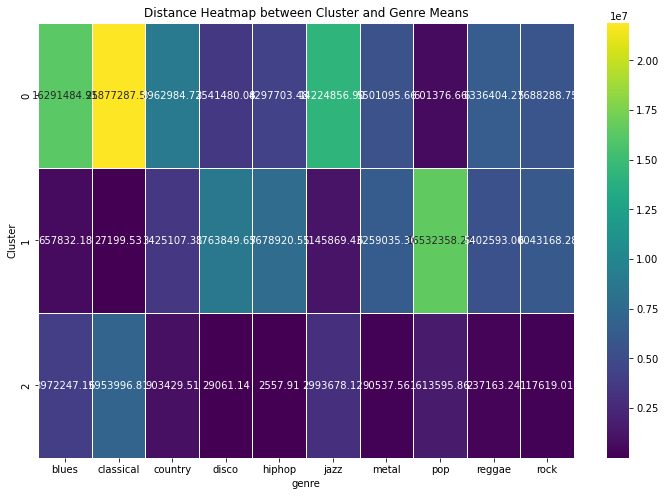

In [65]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_kmean.groupby('Cluster').mean()

distances_df = pd.DataFrame(index=cluster_means.index, columns=genre_means.index)

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).pow(2).sum(axis=1)
    distances_df.loc[cluster_index] = distances

distances_df = distances_df.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(distances_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Distance Heatmap between Cluster and Genre Means')
plt.show()

Clustering is een machine learning techniek. Het wordt vooral gebruikt voor unsupervised learning. Je kan hiermee groepen identificeren in een dataset. Hier moeten wij dus muziek groepen clusteren. Clustering vergelijkt de features van elke rij en plaatst vergelijkbare objecten bij elkaar. Er bestaan verschillende algoritmes om te clusteren, zoals K-means of hierachical clustering. 
Bij K-Means kies je hoeveel groepen (K)  je de data in wilt hebben. Daarna selecteert het willekeurige K-punten, ookwel centroids, dit zijn de startpunten voor de clusters. Het wijst daarna alle datapunten toe aan de dichtstbijzijnde cluster op basis van afstand. Dit is vaak Euclidian distance. Het berekent verder het gemiddelde van alle punten in elk cluster en verplaatst het centrum naar het gemiddelde. Dit herhaalt zich tot de centa zich niet verder veranderen. 

*Wiskundig Voorbeeld*

Er zitten in een dataset de volgende punten : 2,5,8,11,18,23,29,35. Deze punten wil je clusteren in 2 clusters (K=2). Het kiest eerst dus willekeurige punten om te starten. Hier kan dit bijvoorbeeld 8 en 23 zijn. Omdat er maar twee groepen zijn kies je maar twee startpunten. Daarna berekent het de afstand van elk punt naar beide centra en wijst het elk punt toe aan het dichtstbijzijnde centrum. Hier gaat dus [2,5,8,11] naar centrum 8 en [18,23,29,35] naar het centrum 23. Nu pak je het gemiddelde van de centra dus ongeveer 7 en 26. Dit zijn de nieuwe centra. Dit herhaal je totdat het niet meer veranderd. Uiteindelijk krijg je twee clusters bijvoorbeeld 2,5,8,11,18 en 23,29,35. In de praktijk is dit een stuk complexer.

bronnen:
- (z.d.). K-middelen clustering in machinaal leren. Geraadpleegd op 20/1/2024, van https://datascience.eu/nl/machine-learning/k-middelen-clustering-in-machinaal-leren/
- (z.d.). K-means clustering. In Wikipedia. Geraadpleegd op 20/1/2024, van https://en.wikipedia.org/wiki/K-means_clustering

# Hierarchical Clustering

In [67]:
df_hierar = superdf.copy()

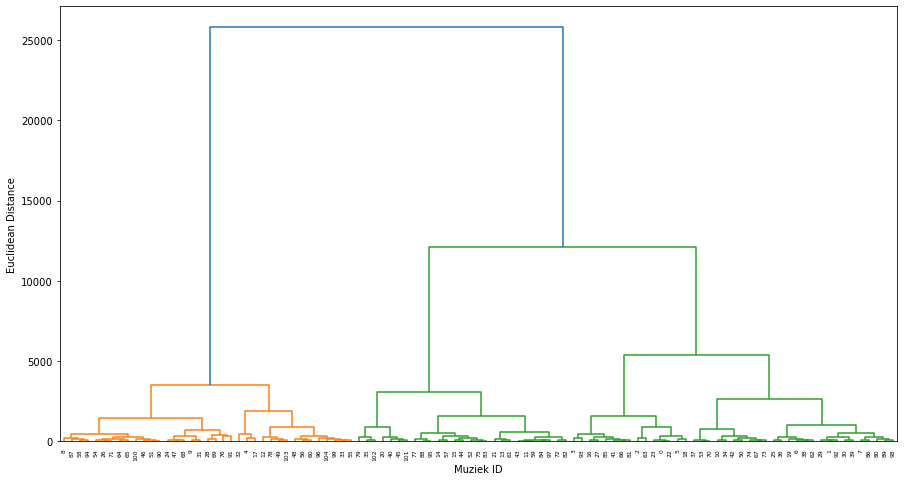

In [68]:
mergings = linkage(df_hierar, method='ward')
plt.figure(figsize=(15,8))
dendrogram(mergings,           
           leaf_rotation=90,
           leaf_font_size=6)
plt.xlabel('Muziek ID')
plt.ylabel('Euclidean Distance')
plt.show()

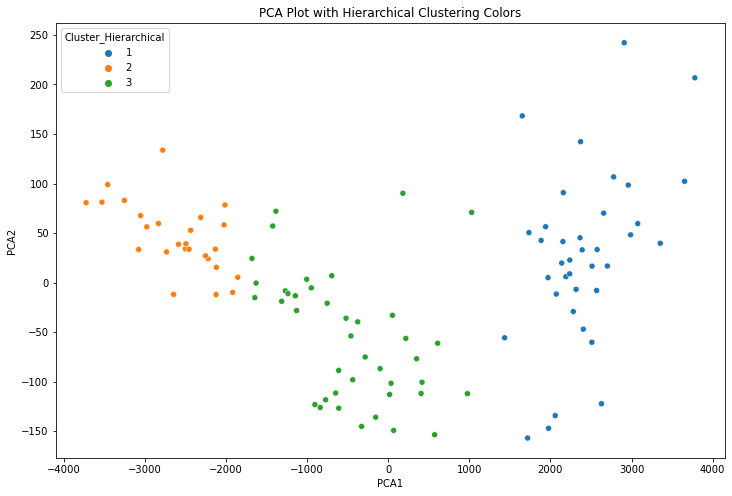

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,PCA1,PCA2,PCA3,PCA4,Cluster_Hierarchical
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,17.832926,16.011167,16.647809,18.873513,40.065665,417.243292,-100.593771,-27.656386,-9.906212,3
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,18.002752,15.368700,15.475696,17.230423,41.887685,-610.182370,-126.746453,-30.213758,0.553991,3
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,21.483555,23.963961,24.473956,23.647332,34.825411,1029.142919,70.900980,-53.377298,16.477748,3
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,15.568276,14.744589,16.072624,19.146556,39.286629,216.928311,-56.348122,-47.385564,-7.249677,3
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,22.318450,24.297560,24.119579,21.639522,17.475061,3654.362571,102.226769,25.725451,-13.018717,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,19.215796,20.529571,21.981498,21.666280,17.207332,2072.766461,-11.567489,26.094645,22.332044,1
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,19.015372,19.193349,17.649666,17.269376,15.490463,-3077.023796,33.451863,15.702554,-2.993552,2
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,18.590920,17.471387,17.419409,15.520504,14.757942,-3458.094318,98.941879,0.042291,21.678839,2
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,23.500862,23.568185,23.957510,22.693431,26.871295,2959.997842,98.440792,-15.222422,-26.769318,1


In [69]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df_hierar)

df_hierar['PCA1'] = pca_result[:, 0]
df_hierar['PCA2'] = pca_result[:, 1]
df_hierar['PCA3'] = pca_result[:, 2]
df_hierar['PCA4'] = pca_result[:, 3]

linked_pca = linkage(pca_result, method='ward', metric='euclidean')
num_clusters_pca = 3
cluster_labels_pca = fcluster(linked_pca, num_clusters_pca, criterion='maxclust')

df_hierar['Cluster_Hierarchical'] = cluster_labels_pca

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='tab10', data=df_hierar, legend='full')
plt.title('PCA Plot with Hierarchical Clustering Colors')
plt.show()
display(df_hierar)

In [71]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_hierar.groupby('Cluster_Hierarchical').mean()

cluster_genre_mapping = {}

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).abs().sum(axis=1)
    closest_genre = distances.idxmin()
    cluster_genre_mapping[cluster_index] = closest_genre
    
df_hierar['genre'] = df_hierar['Cluster_Hierarchical'].map(cluster_genre_mapping)

display(df_hierar)

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,PCA1,PCA2,PCA3,PCA4,Cluster_Hierarchical,genre
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,16.011167,16.647809,18.873513,40.065665,417.243292,-100.593771,-27.656386,-9.906212,3,hiphop
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,15.368700,15.475696,17.230423,41.887685,-610.182370,-126.746453,-30.213758,0.553991,3,hiphop
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,23.963961,24.473956,23.647332,34.825411,1029.142919,70.900980,-53.377298,16.477748,3,hiphop
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,14.744589,16.072624,19.146556,39.286629,216.928311,-56.348122,-47.385564,-7.249677,3,hiphop
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,24.297560,24.119579,21.639522,17.475061,3654.362571,102.226769,25.725451,-13.018717,1,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,20.529571,21.981498,21.666280,17.207332,2072.766461,-11.567489,26.094645,22.332044,1,classical
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,19.193349,17.649666,17.269376,15.490463,-3077.023796,33.451863,15.702554,-2.993552,2,pop
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,17.471387,17.419409,15.520504,14.757942,-3458.094318,98.941879,0.042291,21.678839,2,pop
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,23.568185,23.957510,22.693431,26.871295,2959.997842,98.440792,-15.222422,-26.769318,1,classical


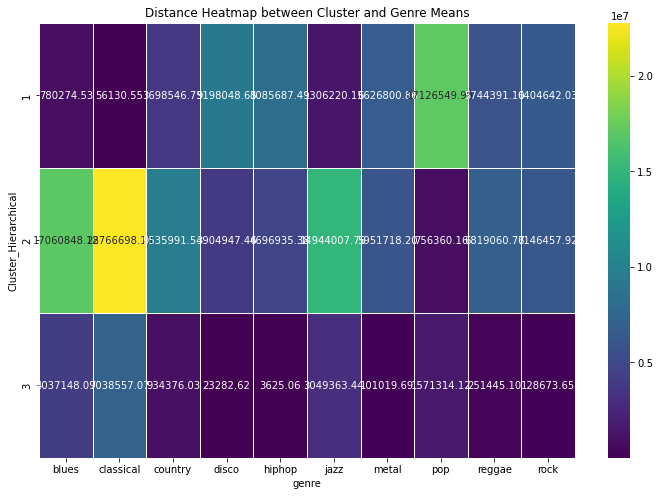

In [73]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_hierar.groupby('Cluster_Hierarchical').mean()

distances_df = pd.DataFrame(index=cluster_means.index, columns=genre_means.index)

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).pow(2).sum(axis=1)
    distances_df.loc[cluster_index] = distances

distances_df = distances_df.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(distances_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Distance Heatmap between Cluster and Genre Means')
plt.show()

Bij Hierarchical Clustering begint elk punt als individuele cluster en voegt de meest vergelijkbare clusters samen totdat alle punten zijn samengevoegd. Je hebt twee benaderingen, agglomerative (bottom-up) en divisie (top-down). Het meest voorkoment is bottom-up. Bij Agglomerative Hierarchical Clustering berekent het eerst de afstand tussen alle punten en zet dat in een matrix. Combineer de twee clusters waar de afstand het kleinst is. Herhaal het combineren totdat de aantal gewenste clusters zijn gevormd. 

*Wiskundig Voorbeeld*

    A B C D E
    
A	-

B	3	-

C	5	1	-

D	4	2	4	-	

E	7	5	6	3	-

Uit de punten A tot en met E hebben wij deze afstandmatrix. Elk punt is een individuele cluster. Nu combineer je herhaaldelijk de twee dichstbijzijnde clusters. Dus als eerst gaan B en C samen door de waarde ‘1’. Dus in de eerste stap zien de clusters er zo uit: {A}, {B,C}, {D},{E}. Hierna kijk je verder naar de kortste afstand dat is bij B en D de 2. In de tweede stap zien de clusters er zo uit: {A}, {B,C,D},{E}. In de derde stap gaat E en A erbij door dat E met D de 3 delen en A met B ook een 3 deelt. Nu zitten alle punten bij elkaar in een cluster. Dit is eenvoudig uitgelegt.

bronnen:
- (z.d.). Understanding the Concept of Hierarchical Clustering Technique. Geraadpleegd op 21/1/2024, van https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
- (z.d.). Hierarchical Cluster Analysis. Geraadpleegd op 21/1/2024, van https://www.statistics.com/glossary/hierarchical-cluster-analysis/

# NMF

In [77]:
df_nmf = superdf.copy()

In [81]:
numeric_cols = df_nmf.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df_nmf[numeric_cols]

scaler = MinMaxScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

n_components = 16

nmf = NMF(n_components=n_components, init='random', random_state=42)
nmf_features = nmf.fit_transform(numeric_data_scaled)

num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(nmf_features)

df_nmf['Cluster_NMF'] = cluster_labels

display(df_nmf)

C:\Users\caspe\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster_NMF,genre
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,0,hiphop
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,0,hiphop
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,1,classical
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,2,hiphop
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,1,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,-0.013989,17.927492,14.882813,19.215796,20.529571,21.981498,21.666280,17.207332,1,pop
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,-0.002690,20.139989,15.154152,19.015372,19.193349,17.649666,17.269376,15.490463,0,pop
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,-0.035701,20.434572,17.928657,18.590920,17.471387,17.419409,15.520504,14.757942,0,pop
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,0.075332,20.021781,22.180632,23.500862,23.568185,23.957510,22.693431,26.871295,1,classical


In [79]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_nmf.groupby('Cluster_NMF').mean()

cluster_genre_mapping = {}

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).pow(2).sum(axis=1)
    closest_genre = distances.idxmin()
    cluster_genre_mapping[cluster_index] = closest_genre

df_nmf['genre'] = df_nmf['Cluster_NMF'].map(cluster_genre_mapping)

display(df_nmf)

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster_NMF,genre
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,1,hiphop
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,1,hiphop
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,2,classical
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,1,hiphop
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,2,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208237,0.392273,0.218967,0.321060,...,-0.013989,17.927492,14.882813,19.215796,20.529571,21.981498,21.666280,17.207332,0,pop
m00973,0.344232,0.477342,0.461315,0.383294,0.430535,0.360271,0.595679,0.406584,0.354102,0.464613,...,-0.002690,20.139989,15.154152,19.015372,19.193349,17.649666,17.269376,15.490463,0,pop
m00988,0.456496,0.418169,0.388712,0.368366,0.340947,0.311360,0.330633,0.407041,0.530387,0.570102,...,-0.035701,20.434572,17.928657,18.590920,17.471387,17.419409,15.520504,14.757942,0,pop
m00991,0.129482,0.094226,0.303209,0.625471,0.278978,0.241658,0.157355,0.215525,0.306956,0.256195,...,0.075332,20.021781,22.180632,23.500862,23.568185,23.957510,22.693431,26.871295,2,classical


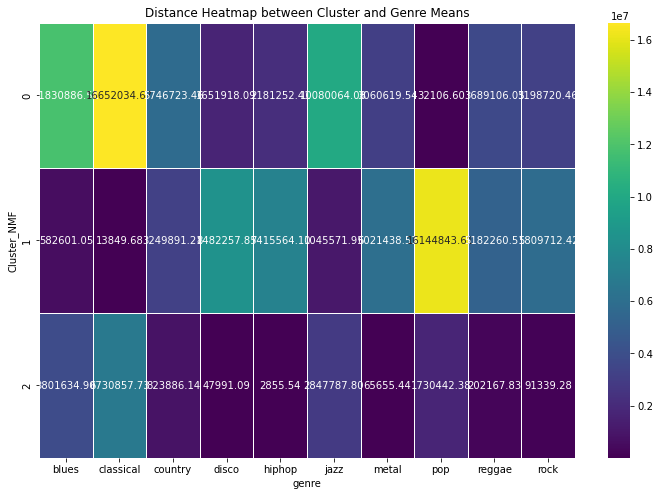

In [44]:
genre_means = super_labeldf.groupby('genre').mean()
cluster_means = df_nmf.groupby('Cluster_NMF').mean()
distances_df = pd.DataFrame(index=cluster_means.index, columns=genre_means.index)

for cluster_index, cluster_row in cluster_means.iterrows():
    distances = genre_means.sub(cluster_row).pow(2).sum(axis=1)
    distances_df.loc[cluster_index] = distances

distances_df = distances_df.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(distances_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Distance Heatmap between Cluster and Genre Means')
plt.show()

NMF is afgekort voor Non-Negative Matrix Factorization. Het is een dimensiereductie techniek, waar een niet-negatieve matrix word vermenigvuldigd in twee lage-dimensionale matrices. Het doel van NMF is om deze matrix te benaderen als het product van twee lage-dimensionale matrices.  

*Wiskundig Voorbeeld*

De niet-negatieve matrix *V* heeft een grootte van *m x n*. Elk element *Vij* waar de i de rij en j de kolom vertegenwoordigt. De twee lage-dimensionale matrices zijn *W(m x r)* en *H(r x n)*, hier is *r* de gereduceerde dimensie. Een NMF-model kan wiskundig worden uitgedrukt als *V ≈ WH*. *W* bevat de basisvectoren en *H* de coëfficiënten bevat. Het wordt beperkt tot niet-negatieve waarden. 

Matrix *V* = 

1 2 3

4 5 6

7 8 9

*W* = 

0.2 0.4

0.5 0.8

0.7 1.0

*H* = 

2 1 0.5

0.5 2 1

*V ≈ WH* = 

1.3 2.1 2.8

3.7 4.9 6.1

6.1 7.7 9.3

bronnen:
- (z.d.). What is Non-Negative Matrix Factorization (NMF)? Geraadpleegd op 20/1/2024, van https://medium.com/codex/what-is-non-negative-matrix-factorization-nmf-32663fb4d65
- (z.d.). Non-Negative Matrix Factorization. Geraadpleegd op 20/1/2024, van https://www.geeksforgeeks.org/non-negative-matrix-factorization/

### Verschil tussen NMF en PCA

Het verschil tussen NMF en PCA is de factorisatie. NMF houdt rekening met de niet-negativiteitsbeperking. Dit betekent dat de basisvectoren en coëfficiënten niet-negatieve waarden hebben. PCA zoekt naar onafhankelijke componenten zonder negativiteitsbeperking. Het maximaliseert de variantie van de data, terwijl NMF de data benaderd als een lineaire combinatie van niet-negatieve componenten. De toepassing en interpretatie verschilt en hangen af van de data en de beperking die daarbij aan het licht komt. 

# Visualisatie

In [45]:
df_cluster_0 = df_kmean[df_kmean['Cluster'] == 0]
df_cluster_1 = df_kmean[df_kmean['Cluster'] == 1]
df_cluster_2 = df_kmean[df_kmean['Cluster'] == 2]

display(df_cluster_0.head(5), df_cluster_1.head(5), df_cluster_2.head(5))

,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster,genre
m00114,0.392071,0.428158,0.523789,0.385555,0.366227,0.433112,0.444056,0.591267,0.437267,0.413407,...,-0.033667,26.155280,15.999003,18.270417,18.272482,18.356818,16.226962,15.919123,0,pop
m00137,0.246041,0.333386,0.421523,0.297409,0.415089,0.294910,0.479907,0.531672,0.404512,0.522278,...,-0.003501,20.531860,15.171050,18.383116,18.560841,18.075726,17.730779,15.329543,0,pop
m00139,0.345767,0.396921,0.457235,0.444118,0.447026,0.402055,0.557229,0.347928,0.324602,0.391505,...,-0.002783,20.079766,15.883508,18.237794,17.666586,17.992227,17.249155,15.708507,0,pop
m00148,0.334655,0.320497,0.436491,0.319758,0.342102,0.253589,0.336049,0.447382,0.300387,0.315116,...,-0.003548,23.735005,18.811219,21.155409,19.425883,18.620502,17.503729,15.824221,0,pop
m00218,0.379050,0.387239,0.546723,0.488126,0.503134,0.426171,0.422258,0.520548,0.396919,0.412963,...,-0.006595,17.644772,15.420195,18.630913,17.311664,17.332384,16.923016,15.382298,0,pop


,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster,genre
m00013,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,...,0.015149,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825411,1,classical
m00044,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,...,-0.002277,14.756063,17.163709,22.318450,24.297560,24.119579,21.639522,17.475061,1,classical
m00069,0.153987,0.300343,0.299983,0.405683,0.282089,0.119845,0.154698,0.264673,0.207389,0.292909,...,-0.003089,16.180115,20.926335,24.046660,23.246691,23.753461,20.913284,26.348253,1,classical
m00074,0.179625,0.249873,0.655830,0.239777,0.225172,0.278858,0.316529,0.542954,0.221782,0.321671,...,-0.033303,18.156364,16.625324,20.351860,21.561308,23.611416,22.422523,20.274100,1,classical
m00127,0.367230,0.334381,0.395324,0.481455,0.493138,0.385421,0.556038,0.525097,0.292477,0.273359,...,-0.004750,15.998219,16.599278,21.064907,16.908625,16.670544,17.055350,14.021218,1,classical


,CENS_0,CENS_1,CENS_2,CENS_3,CENS_4,CENS_5,CENS_6,CENS_7,CENS_8,CENS_9,...,Tonnetz6,SpectralContrast1,SpectralContrast2,SpectralContrast3,SpectralContrast4,SpectralContrast5,SpectralContrast6,SpectralContrast7,Cluster,genre
m00003,0.471297,0.409747,0.488772,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,...,-0.009527,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065665,2,hiphop
m00012,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,...,0.003401,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887685,2,hiphop
m00043,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,...,-0.025107,18.871521,14.355007,15.568276,14.744589,16.072624,19.146556,39.286629,2,hiphop
m00055,0.308940,0.418923,0.317481,0.317869,0.495308,0.381529,0.407861,0.321004,0.401796,0.483401,...,0.044520,24.412629,17.589618,21.201438,20.587069,21.338418,19.083820,16.459585,2,hiphop
m00061,0.378747,0.342769,0.419572,0.443366,0.550129,0.514991,0.522471,0.549509,0.451431,0.383654,...,-0.008896,17.778284,15.514382,15.290346,15.683375,15.583587,17.171288,40.688193,2,hiphop


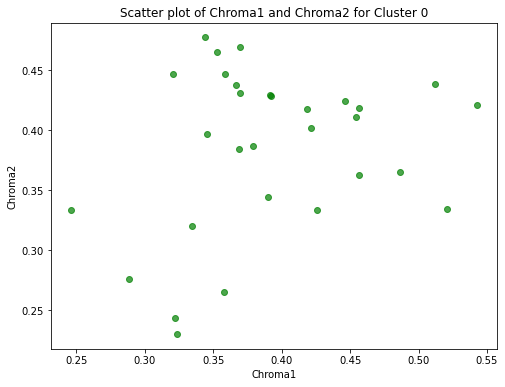

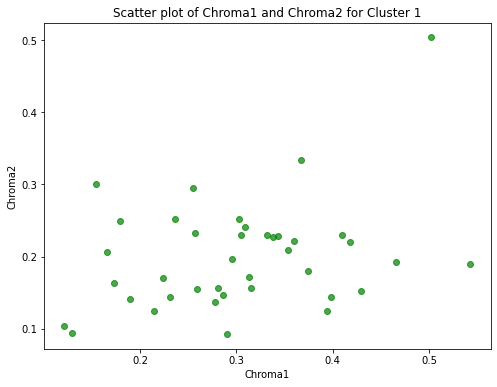

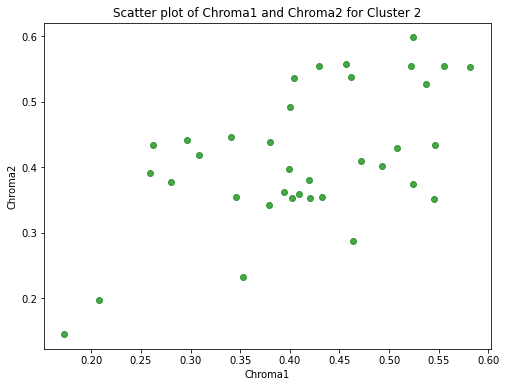

In [46]:
cluster_dataframes = [df_cluster_0, df_cluster_1, df_cluster_2]

for cluster_label, cluster_df in enumerate(cluster_dataframes):
    plt.figure(figsize=(8, 6))
    plt.scatter(cluster_df['Chroma1'], cluster_df['Chroma2'], color='green', alpha=0.7)
    plt.title(f'Scatter plot of Chroma1 and Chroma2 for Cluster {cluster_label}')
    plt.xlabel('Chroma1')
    plt.ylabel('Chroma2')
    plt.show()


Hier kunnen wij zien welke toonhoogtes voorkomen in elk cluster. Bij cluster 0 verschilt dit heel erg. Het is verspreid van 0.25 tot 0.45. Bij cluster 1 zijn de toonhoogtes lager. Ze zitten tussen de 0.1 en 0.3, toch zit er één uitschieter bij. Cluster 2 is verspreid van 0.3 en 0.6. Hier zijn de toonhoogtes dus relatief hoger dan de rest van de clusters. Vaak wordt pop of opera geassocieerd met hogere tonen. Metal wordt geassocieerd met lagere tonen. Het kan dus heel goed zijn dat cluster 1 metal is en cluster 2 pop is. 

In [47]:
cluster_stats = df_kmean.groupby('Cluster').agg(['mean', 'std', 'median', 'min', 'max'])
display(cluster_stats)
labeld_stats = super_labeldf.groupby('genre').agg(['mean', 'std', 'median', 'min', 'max'])
display(labeld_stats)

C:\Users\caspe\AppData\Local\Temp\ipykernel_3540\1866006459.py:1: FutureWarning: ['genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_stats = df_kmean.groupby('Cluster').agg(['mean', 'std', 'median', 'min', 'max'])


CENS_0                                            CENS_1            \
             mean       std    median       min       max      mean       std   
Cluster                                                                         
0        0.392101  0.069688  0.374407  0.246041  0.542472  0.384737  0.067561   
1        0.302362  0.100141  0.302394  0.121688  0.542743  0.200045  0.075606   
2        0.413553  0.102349  0.414147  0.173138  0.581690  0.414597  0.105242   

                                       ... SpectralContrast6            \
           median       min       max  ...              mean       std   
Cluster                                ...                               
0        0.406219  0.230262  0.477342  ...         17.445096  1.157054   
1        0.192469  0.092485  0.503990  ...         22.693739  1.992161   
2        0.405446  0.145490  0.597753  ...         17.802290  1.598502   

                                         SpectralContrast7             \
            median        min        max              mean        std   
Cluster                                                                 
0        17.259265  15.520504  19.684795         15.591211   0.753329   
1        22.693431  17.055350  27.818632         24.736960   6.897979   
2        17.319812  15.487872  23.341183         35.013167  11.105582   

                                          
            median        min        max  
Cluster                                   
0        15.501614  14.656236  18.155962  
1        26.871295  14.021218  34.825411  
2        40.546548  15.044207  45.241230  

[3 rows x 360 columns]

CENS_0                                            CENS_1  \
               mean       std    median       min       max      mean   
genre                                                                   
blues      0.311286  0.079258  0.274046  0.242554  0.415285  0.269451   
classical  0.314833  0.134403  0.258693  0.187188  0.536253  0.249797   
country    0.337929  0.073383  0.323533  0.243771  0.430533  0.373986   
disco      0.376317  0.064674  0.369378  0.286717  0.444535  0.369123   
hiphop     0.506444  0.043240  0.492696  0.463361  0.578105  0.511663   
jazz       0.298364  0.108318  0.336665  0.117655  0.392876  0.223566   
metal      0.458911  0.071557  0.475155  0.350615  0.542002  0.457746   
pop        0.432577  0.127356  0.455656  0.227938  0.563313  0.430648   
reggae     0.414342  0.042941  0.412044  0.368239  0.471198  0.407777   
rock       0.383660  0.109117  0.384500  0.274007  0.540783  0.400270   

                                                   ... SpectralContrast7  \
                std    median       min       max  ...              mean   
genre                                              ...                     
blues      0.075279  0.273155  0.188751  0.377828  ...         35.784682   
classical  0.102542  0.249862  0.100577  0.390006  ...         23.410668   
country    0.170842  0.336809  0.185482  0.649525  ...         30.202320   
disco      0.036335  0.369671  0.321649  0.422924  ...         21.212792   
hiphop     0.073487  0.505869  0.436596  0.631416  ...         41.617110   
jazz       0.064974  0.236142  0.133911  0.311317  ...         28.826242   
metal      0.085571  0.446971  0.337388  0.567155  ...         41.810886   
pop        0.127201  0.476398  0.215738  0.537429  ...         16.114647   
reggae     0.058735  0.406847  0.333314  0.467546  ...         25.554982   
rock       0.058066  0.383383  0.347885  0.499464  ...         30.884798   

                                                         Hertz                \
                 std     median        min        max     mean  std   median   
genre                                                                          
blues       7.757359  36.490666  26.015946  44.900553  22050.0  0.0  22050.0   
classical   8.400716  21.250464  15.883361  35.816152  22050.0  0.0  22050.0   
country    13.068289  39.048970  15.601996  41.061713  22050.0  0.0  22050.0   
disco      12.514217  16.063516  14.582781  43.553942  22050.0  0.0  22050.0   
hiphop      1.190454  42.231596  39.880894  42.760727  22050.0  0.0  22050.0   
jazz       10.659190  34.600592  16.584980  37.841346  22050.0  0.0  22050.0   
metal       1.308869  41.315331  40.250016  43.431877  22050.0  0.0  22050.0   
pop         1.197381  15.772323  15.156099  18.110775  22050.0  0.0  22050.0   
reggae     11.822437  21.429273  14.779563  38.304347  22050.0  0.0  22050.0   
rock       12.377250  38.366791  16.951671  42.133186  22050.0  0.0  22050.0   

                         
             min    max  
genre                    
blues      22050  22050  
classical  22050  22050  
country    22050  22050  
disco      22050  22050  
hiphop     22050  22050  
jazz       22050  22050  
metal      22050  22050  
pop        22050  22050  
reggae     22050  22050  
rock       22050  22050  

[10 rows x 385 columns]

We kunnen hier een beetje met de oog vergelijken bij welke features de clusters en de genres overeenkomen. Zo zien wij vaak pop, hip hop, jazz, en klassieke muziek terug komen.

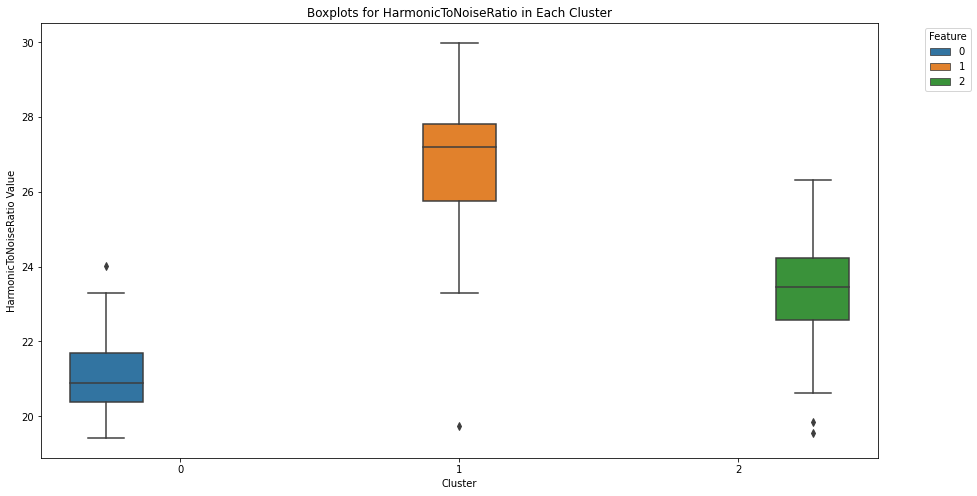

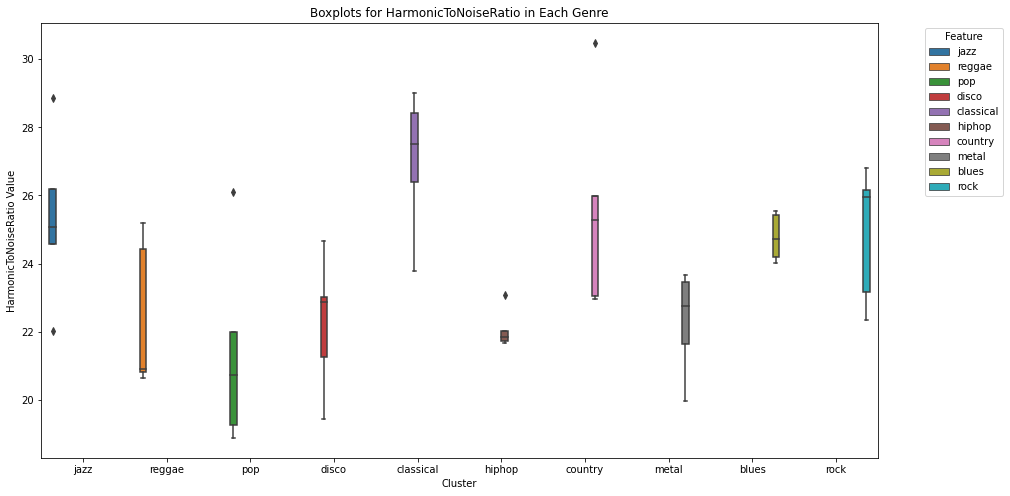

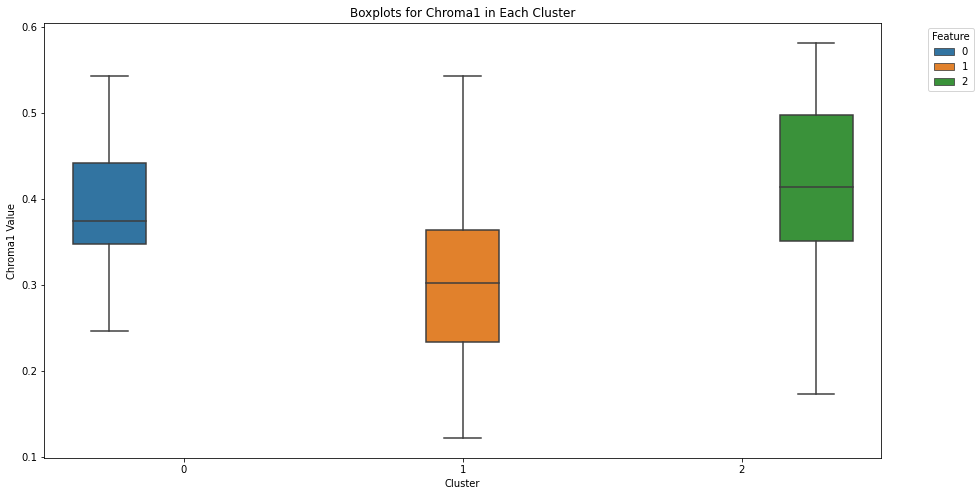

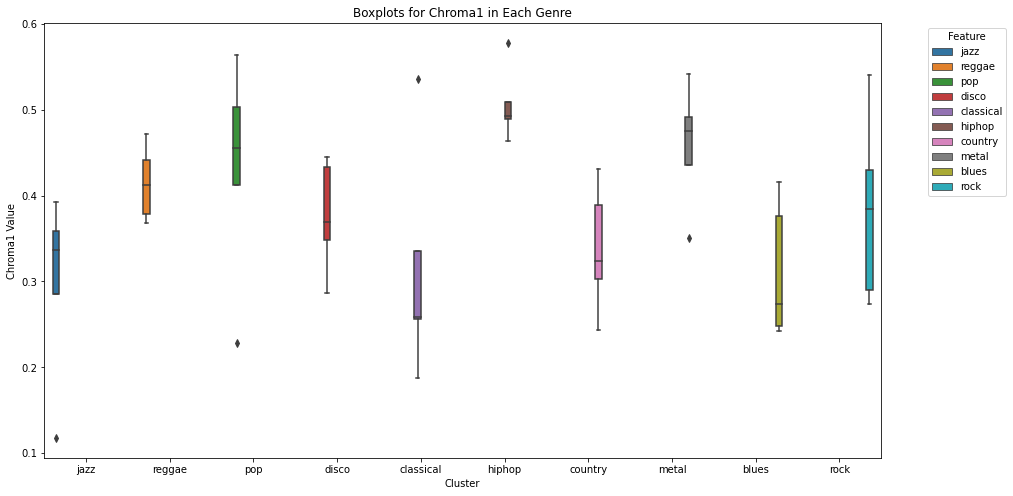

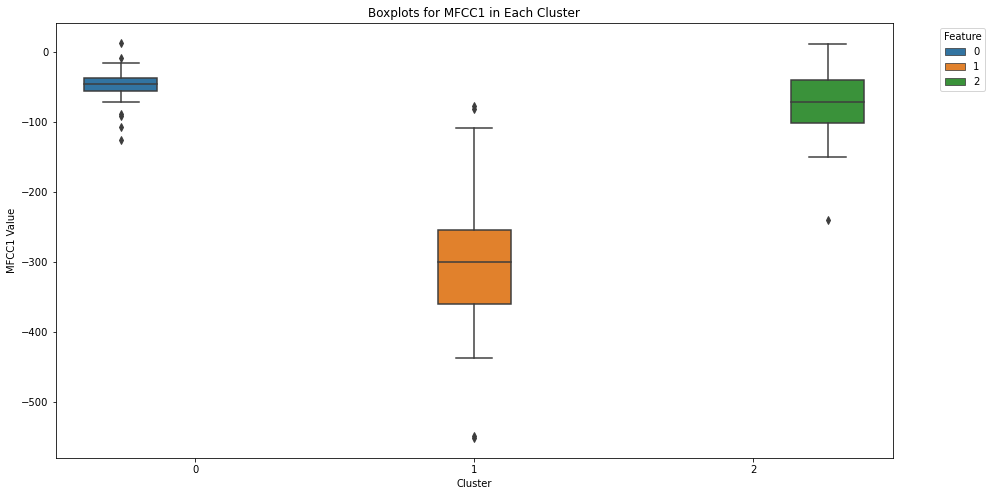

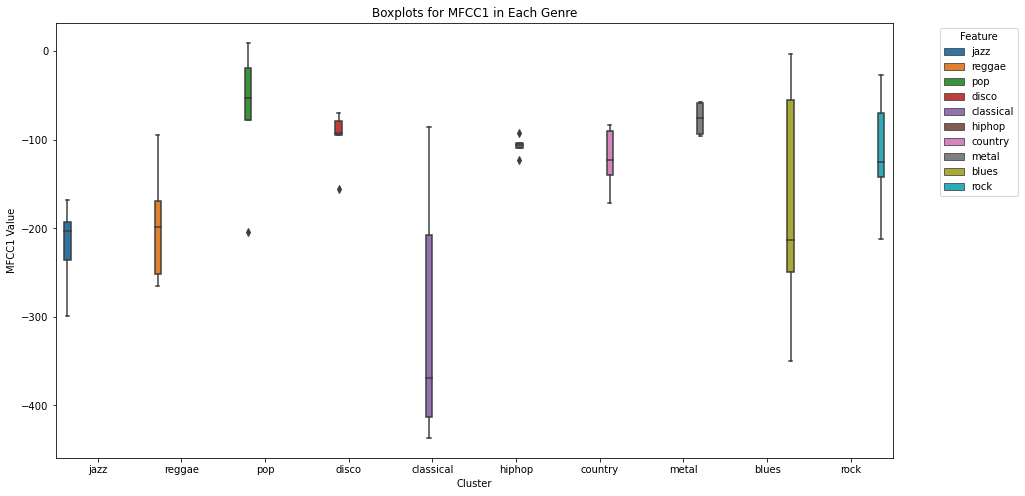

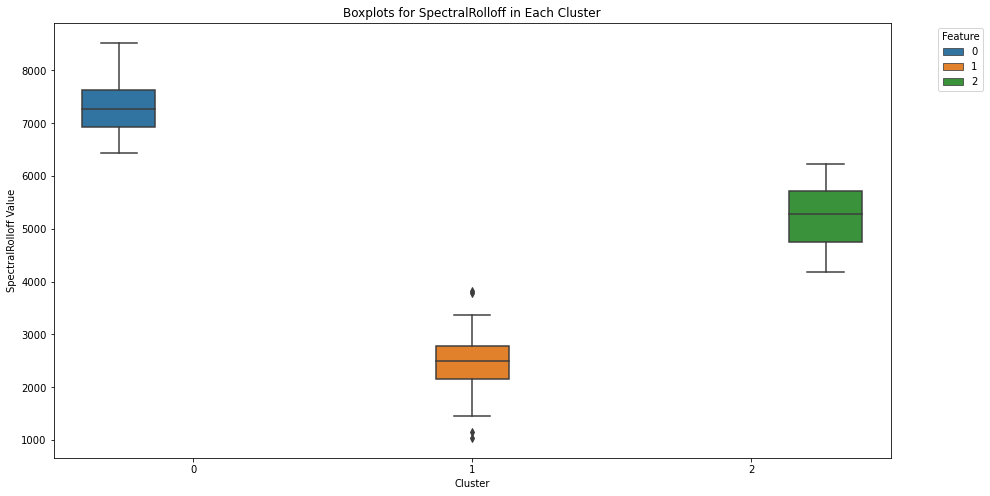

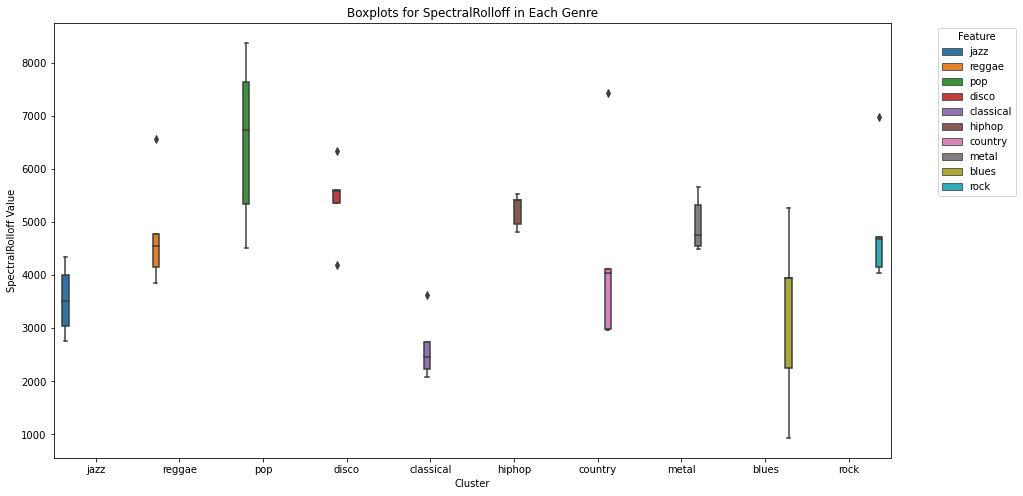

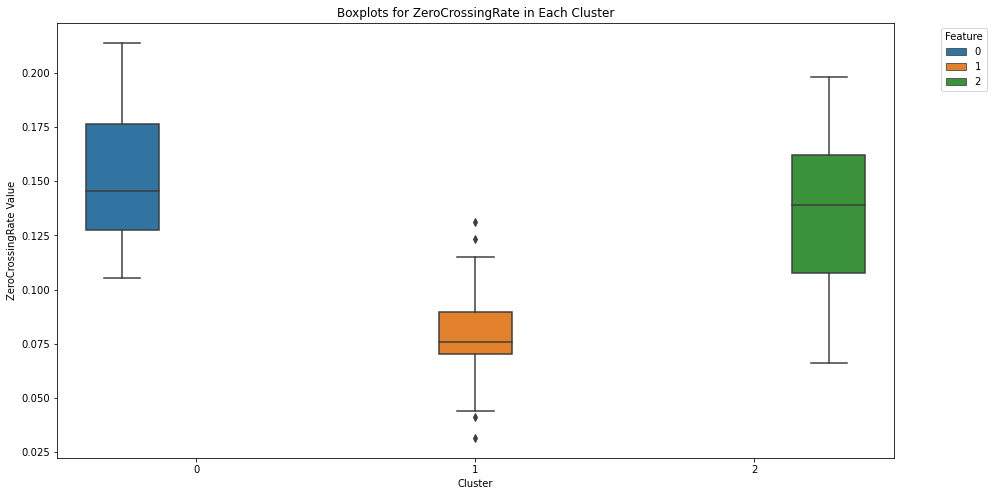

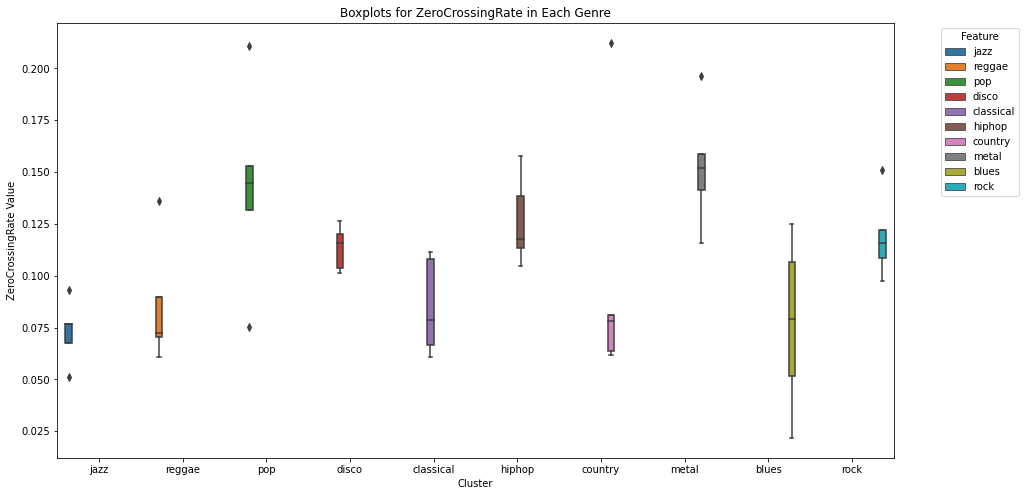

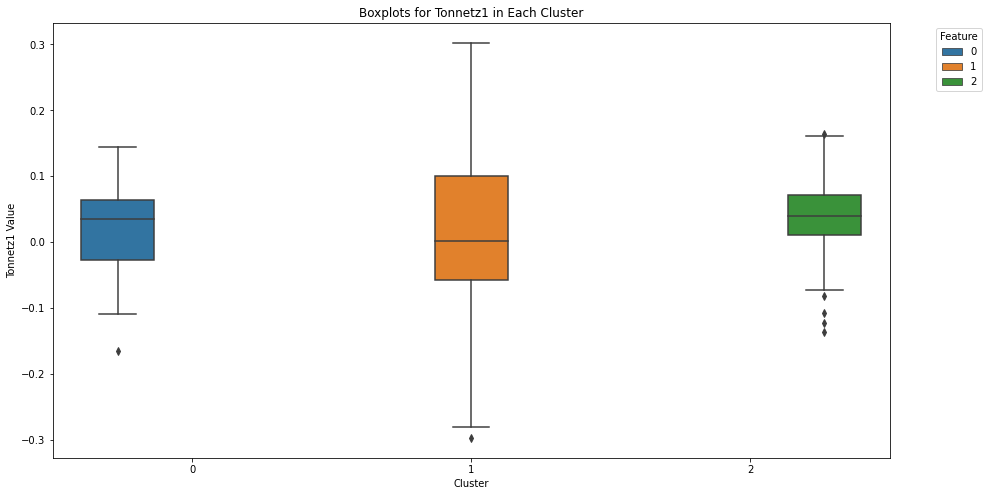

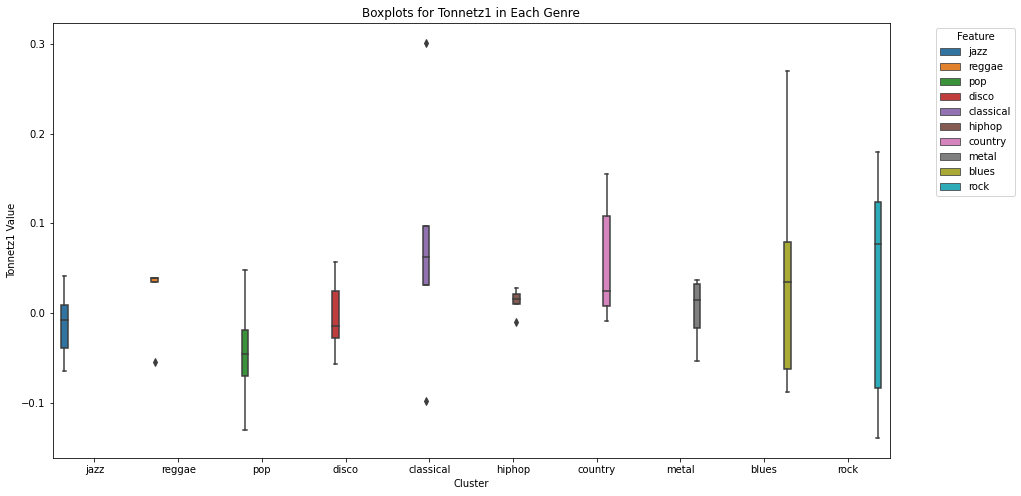

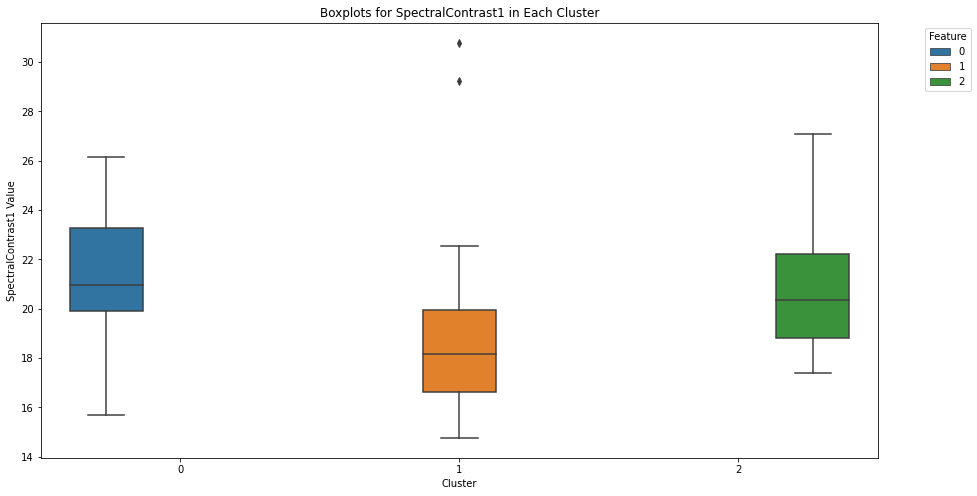

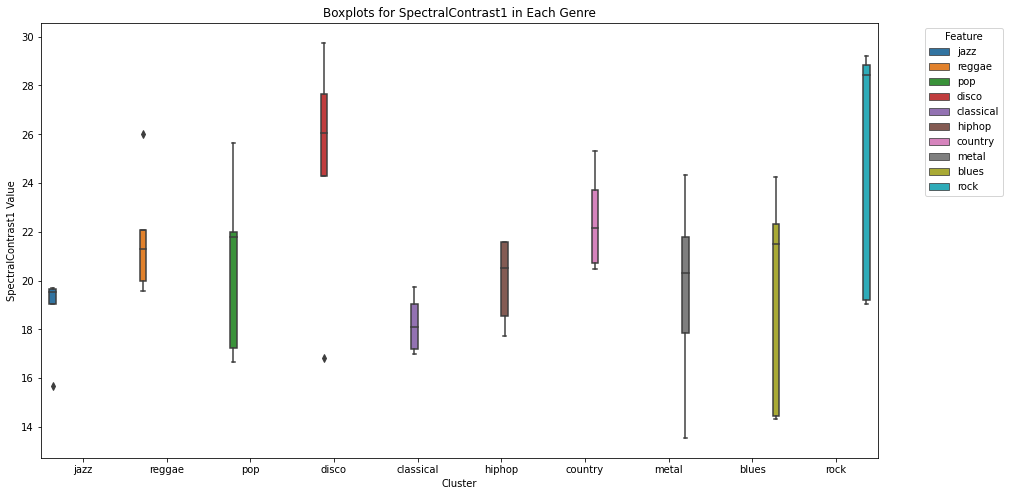

In [48]:
features_to_plot = ['HarmonicToNoiseRatio', 'Chroma1', 'MFCC1', 'SpectralRolloff', 'ZeroCrossingRate', 'Tonnetz1', 'SpectralContrast1']  # Add more features as needed

for feature in features_to_plot:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Cluster', y=feature, hue='Cluster', data=df_kmean)
    plt.title(f'Boxplots for {feature} in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature} Value')
    plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    plt.figure(figsize=(15, 8))
    sns.boxplot(x='genre', y=feature, hue='genre', data=super_labeldf)
    plt.title(f'Boxplots for {feature} in Each Genre')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature} Value')
    plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In de boxplots kan je zien dat cluster 1 vaak overeenkomt met klassieke muziek. Je ziet ook vaak dat 2 overeenkomt met metal of hip hop. Cluster 0 komt vooral overeen met pop. Hier kunnen wij uit concluderen dat cluster 0 waarschijnlijk pop is, 1 klassiek en 2 metal of hip hop is.

# **Verschil Tussen Clusters** 

In [84]:
cross_tab = pd.crosstab(df_hierar['Cluster_Hierarchical'], df_kmean['Cluster'], margins=True, margins_name="Total")
display(cross_tab)

Cluster,0,1,2,Total
Cluster_Hierarchical,,,,
1,0,37,0,37
2,27,0,0,27
3,3,2,36,41
Total,30,39,36,105


Met deze Corsstab vrgelijken we de hierarchical met de normale kmean cluster. Zo kunnen we zien dat alleen in cluster 3 verschillen zijn.

In [85]:
cross_tab = pd.crosstab(df_nmf['Cluster_NMF'], df_kmean['Cluster'], margins=True, margins_name="Total")
display(cross_tab)

Cluster,0,1,2,Total
Cluster_NMF,,,,
0,30,2,17,49
1,0,37,1,38
2,0,0,18,18
Total,30,39,36,105


Hier vergelijken we NFM met de normale kmeans. Weer kunnen we zien dat 1 cluster het grootste verschil heeft en dat de andere cluster erg veel op elkaar lijken.


In [86]:
cross_tab = pd.crosstab(df_hierar['Cluster_Hierarchical'], df_nmf['Cluster_NMF'], margins=True, margins_name="Total")
display(cross_tab)

Cluster_NMF,0,1,2,Total
Cluster_Hierarchical,,,,
1,2,35,0,37
2,27,0,0,27
3,20,3,18,41
Total,49,38,18,105


Nu bekijken we hierarchical met NFM. Zo kunnen we ook bij deze zien dat we bij één cluster veel verschild en de andere redlijk het zelfde zijn.

In [87]:
cross_tab = pd.crosstab(df_kmean['Cluster'], df_kmean_tsne['Cluster'], margins=True, margins_name="Total")
display(cross_tab)

Cluster,0,1,2,Total
Cluster,,,,
0,3,0,27,30
1,5,34,0,39
2,24,0,12,36
Total,32,34,39,105


Nu kijken we naar de kmeans en de kmeans met de TSNE. Hier zit de grootste verschillen in. Want geen van de clusters zijn gelijk. Ook al zijn het wel de zelfde genres (hiphop, pop en classical) maar is de volgorde gewoon heel anders.


In [88]:
cross_tab = pd.crosstab(df_hierar['Cluster_Hierarchical'], df_kmean_tsne['Cluster'], margins=True, margins_name="Total")
display(cross_tab)

Cluster,0,1,2,Total
Cluster_Hierarchical,,,,
1,4,33,0,37
2,1,0,26,27
3,27,1,13,41
Total,32,34,39,105


Zelfde als bij de kmeans en tsne. Bij de hierarchial en tsne zijn nu ook grote verschillen.

In [89]:
cross_tab = pd.crosstab(df_nmf['Cluster_NMF'], df_kmean_tsne['Cluster'], margins=True, margins_name="Total")
display(cross_tab)

Cluster,0,1,2,Total
Cluster_NMF,,,,
0,14,2,33,49
1,6,32,0,38
2,12,0,6,18
Total,32,34,39,105


En ook met de NFM en TSNE. TSNE voorspeld heel erg anders dan de andere. Dus als we ze vergelijken zien we grote verschillen. We verwachten dat als we de scores gaan invoeren dat we dit patroon terug gaan zien.


# APP 

In [82]:
new_sound_features_df = process_audio_files('suggestie')  
new_sounds_cens = process_cens('suggestie')
new_sound = pd.concat([new_sound_features_df, new_sounds_cens], axis=1)

new_sound.drop(['Tempo', 'SpectralCentroid', 'SpectralBandwidth', 'RMSEnergy', 'Hertz'], axis=1, inplace=True)
new_sound_numeric = new_sound[numeric_cols]

new_sound['Cluster'] = kmeans.predict(new_sound_numeric)

print(new_sound)

selected_cluster = new_sound['Cluster'].iloc[0]

similar_sounds = df_kmean[df_kmean['Cluster'] == selected_cluster]

recommendations = similar_sounds.head(n=5)
print(recommendations.index)

               Chroma1   Chroma2   Chroma3   Chroma4   Chroma5   Chroma6  \
m00833-Copy1  0.404526  0.536411  0.397286  0.278356  0.252183  0.233051   

               Chroma7   Chroma8   Chroma9  Chroma10  ...   CENS_15   CENS_16  \
m00833-Copy1  0.346843  0.265659  0.369217   0.37026  ...  0.260867  0.263834   

               CENS_17   CENS_18   CENS_19   CENS_20   CENS_21   CENS_22  \
m00833-Copy1  0.229967  0.339225  0.239458  0.317853  0.333724  0.256974   

               CENS_23  Cluster  
m00833-Copy1  0.331032        2  

[1 rows x 73 columns]
Index(['m00003', 'm00012', 'm00043', 'm00055', 'm00061'], dtype='object')


C:\Users\caspe\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Voor het functioneren van de app dien je voor suggesties een map aan te geven waarin je de muziekbestanden hebt staan die je wilt vergelijken. Voor dit bestand worden dan dezelfde kenmerken aangemaakt die we ook hebben gebruikt voor onze andere kmeans-clustering. Vervolgens selecteren we eenvoudigweg de nummers die in dezelfde cluster zitten als het gekozen nummer als recommendatie.

# Kaggle

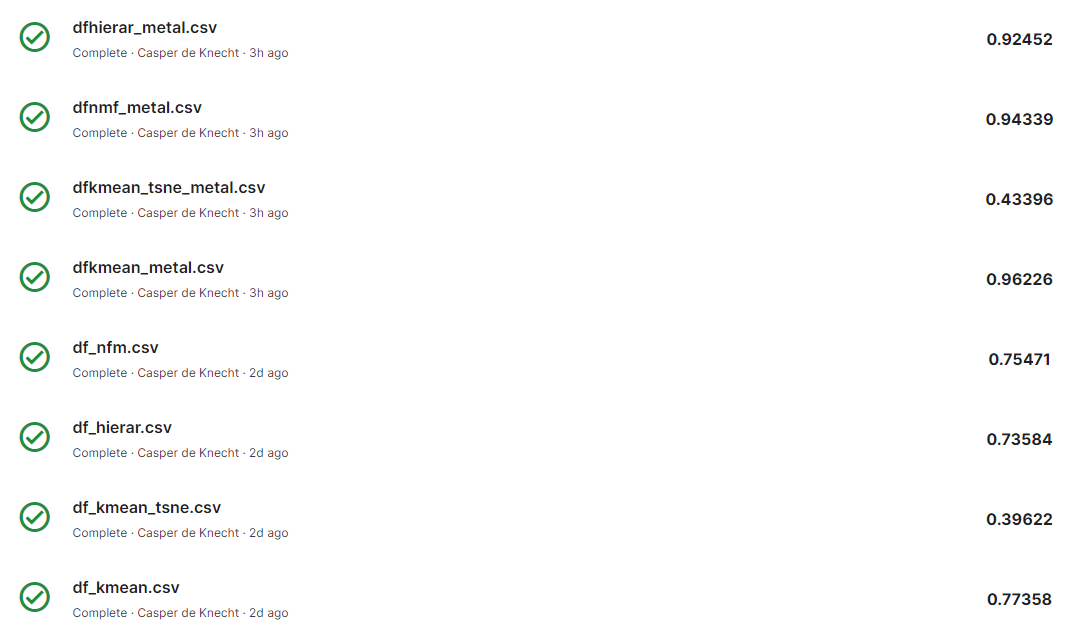

Hier kun je onze scores zien voor verschillende clusteringmodellen. Zoals we hier kunnen zien, presteert het afzonderlijke KMeans-model het beste. Wat ons wel opvalt, is dat de KMeans TSNE een lage score heeft. Hoewel ze dezelfde genres voorspellen als de normale KMeans. Wij denken dat de reden is dat de voorspelling van KMeans TSNE zo slecht is, omdat de volgorde van de cluster slecht wordt gemaakt. Dat kunnen we ook zien in de crosstables.

We wisten al dat de echte clusters pop, klassiek en metal zouden moeten zijn. Maar we kunnen niet bereiken dat de derde cluster als metal wordt voorspeld, omdat er veel andere clusters toch iets dichterbij liggen. Omdat we het nog wilden testen, hebben we eenvoudigweg de cluster die er niet bij hoort veranderd naar metal. Dan kun je ook zien dat de scores meteen een stuk beter zijn. Dus de correcte cluster moet echt metal zijn.

## Bronnen 

- DataCamp. (z.d.). Principal Component Analysis in Python. Geraadpleegd op 20/1/2024, van https://www.datacamp.com/tutorial/principal-component-analysis-in-python



- K-means clustering. In Wikipedia. Geraadpleegd op 20/1/2024, van https://en.wikipedia.org/wiki/K-means_clustering



- LibROSA. (z.d.). beat_track — LibROSA documentation. Geraadpleegd op 10/1/2024, van 
https://librosa.org/doc/main/generated/librosa.beat.beat_track.html



- LibROSA. (z.d.). chroma_stft — LibROSA documentation. Geraadpleegd op 10/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html



- LibROSA. (z.d.). hpss — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.effects.hpss.html



- LibROSA. (z.d.). mfcc — LibROSA documentation. Geraadpleegd op 12/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.mfcc.html




- LibROSA. (z.d.). rms — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.rms.html



- LibROSA. (z.d.). spectral_bandwidth — LibROSA documentation. Geraadpleegd op 16/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html



- LibROSA. (z.d.). spectral_centroid — LibROSA documentation. Geraadpleegd op 16/1/2024, van https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html



- LibROSA. (z.d.). spectral_contrast — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.spectral_contrast.html



- LibROSA. (z.d.). spectral_rolloff — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html



- LibROSA. (z.d.). tonnetz — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.tonnetz.html



- LibROSA. (z.d.). zero_crossing_rate — LibROSA documentation. Geraadpleegd op 18/1/2024, van https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html



- OpenAI. (2024). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/a7cd344c-2979-4dd6-8069-e978d1f53be5



- OpenAI. (z.d.). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/57483d6b-4bcc-470c-90d7-92c3ad70d7ff



- OpenAI. (z.d.). ChatGPT - Language Model. Geraadpleegd op 20/1/2024, van https://chat.openai.com/share/61b340b8-f4cd-49e4-bda3-53bc2a76bb0b



- OpenAI. (z.d.). ChatGPT - Language Model. Geraadpleegd op 21/1/2024, van https://chat.openai.com/share/f20fda0d-1a3c-46d4-82f8-14e10b07a410



- OpenAI. ChatGPT: Language Model by OpenAI. Geraadpleegd op 21/1/2024 https://chat.openai.com/share/fb04c19c-780a-48ef-9b36-2a35e4569039



- Rossignol, S., & Cromwell, H. C. (2002). Geraadpleegd op 18/1/2024, https://doi.org/10.1016/s0167-6393(02)00057-2



- t-SNE Clearly Explained. Geraadpleegd op 20/1/2024, van https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a



- TwoEars. (z.d.). Onset Strength — TwoEars documentation documentatie. Geraadpleegd op 10/1/2024, van https://docs.twoears.eu/en/latest/afe/available-processors/onset-strength/#:~:text=Onset%20strength%20(%20onsetProc.-,m%20),originating%20from%20the%20same%20source.



- Understanding the Concept of Hierarchical Clustering Technique. Geraadpleegd op 21/1/2024, van https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec



- Van Dalen, A. (z.d.). Universiteit Twente. Geraadpleegd op 19/1/2024, van https://essay.utwente.nl/76916/1/A%20van%20Dalen_BA_RAM.pdf



- Wikipedia. (z.d.). Eigenwaarde (wiskunde). In Wikipedia. Geraadpleegd op 21/1/2024, van https://nl.wikipedia.org/wiki/Eigenwaarde_(wiskunde)



- Wikipedia. (z.d.). Spectral centroid. In Wikipedia. Geraadpleegd op 16/12024, van https://en.wikipedia.org/wiki/Spectral_centroid



- What is Non-Negative Matrix Factorization (NMF)? Geraadpleegd op 20/1/2024, van https://medium.com/codex/what-is-non-negative-matrix-factorization-nmf-32663fb4d65



- (z.d.). Hierarchical Cluster Analysis. Geraadpleegd op 21/1/2024, van https://www.statistics.com/glossary/hierarchical-cluster-analysis/



- (z.d.). K-middelen clustering in machinaal leren. Geraadpleegd op 20/1/2024, van https://datascience.eu/nl/machine-learning/k-middelen-cl